
<hr style="border:2px solid gray"> </hr>

# $\color{blue}{\text{Introducción a la Computación Cuántica}}$
<hr style="border:2px solid gray"> </hr>



<hr style="border:2px solid gray"> </hr>

# $\color{blue}{\text{Primer Taller}}$
<hr style="border:2px solid gray"> </hr>

# **1. Brevísima Introducción a Python**


 **Para instalar módulos de Python usamos *!pip install nombre_módulo***

In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Para redondear un número**

In [ ]:
import numpy as np
print(np.round(np.pi,4))

3.1416


### **Listas en Python**

In [ ]:
lista = [0,1,2,3,4,5]
print(lista[1])
print(lista[0:-1])

1
[0, 1, 2, 3, 4]


### **Lazos (loops) *for***

In [ ]:
for i in range(5):
  print("Hola mundo i=%d" %i)

Hola mundo i=0
Hola mundo i=1
Hola mundo i=2
Hola mundo i=3
Hola mundo i=4


In [ ]:
lista = [i for i in range(10)]
lista

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### **Graficación con el módulo *matplotlib***

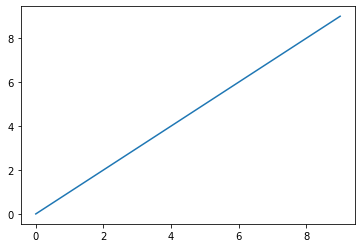

In [ ]:
import matplotlib.pyplot as plt
plt.plot(lista)
plt.draw()

### **Lazos *while***

In [ ]:
i = 10
while (i < 15):
  print(i,end=",")
  i = i + 1

10,11,12,13,14,

### **Funciones en Python**

In [ ]:
def f(x):
  return 2*x
f(3)

6

### **Arreglos de numpy**

In [ ]:
a = np.array([1,3,5.31,2,-10.3])
print("El mínimo es %2.3f y el mínimo %2.3e" %(a.min(),a.max()))

El mínimo es -10.300 y el mínimo 5.310e+00


In [ ]:
b=np.where(a<3) # da los índices donde se cumple la condición
print(b)

(array([0, 3, 4]),)


### **Uso de *if else***

In [ ]:
a = [1,3,5,2,0]
for i in a:
  if i < 3 :
    print(i, " es < que 3")
  else:
    print(i, " es >= que 3")

1  es < que 3
3  es >= que 3
5  es >= que 3
2  es < que 3
0  es < que 3


## **Instalacion de Jupyter en un ambiente virtual**

Para instalar **jupyter** en un ambiente virtual de Python3 de una PC/laptop como alternativa al uso de Google Colab 
ejecutamos los comandos siguientes en una terminal de Ubuntu

- sudo apt install python3-pip python3-dev
- sudo pip3 install virtualenv
- virtualenv Qiskit
- cd Qiskit/
- source bin/activate
- pip install jupyter
- pip install notebook
- pip install jupyterlab
- jupyterlab

# **2. Introducción a la Programación Cuántica usando Qiskit** 

Primero instalamos el módulo *qiskit* y la librería *pylatexenc* para dibujar los diagramas con matplotlib


In [ ]:
!pip install qiskit
!pip install pylatexenc # instalamos la librería *pylatexenc* para dibujar circuitos con matplotlib 

In [ ]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.23.1', 'qiskit-aer': '0.11.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.0', 'qiskit': '0.41.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

## **2.1 Compuertas Cuánticas**

Recordemos que
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

 para la compuerta X de Pauli

$$ X =\ket{0}\bra{1} + \ket{1}\bra{0}$$

$$ X \ket{0} = \ket{1}$$
$$ X \ket{1} = \ket{0}$$

para la compuerta Y de Pauli
$$ Y =-i\ket{0}\bra{1} + i\ket{1}\bra{0}$$

$$ Y \ket{0}= i\ket{1}$$
$$ Y \ket{1}= -i\ket{0}$$

para la compuerta Z de Pauli
$$ Z =\ket{0}\bra{0} - \ket{1}\bra{1}$$

$$ Z \ket{0}= \ket{0} $$
$$ Z \ket{1}= -\ket{1} $$

Para la compuerta H de Hadamard
$$ H =\frac{\ket{0}+\ket{1}}{\sqrt{2}} \bra{0}+ \frac{\ket{0}-\ket{1}}{\sqrt{2}} \bra{1}$$

$$ H \ket{0} =\frac{\ket{0}+\ket{1}}{\sqrt{2}}$$
$$ H \ket{1} =\frac{\ket{0}-\ket{1}}{\sqrt{2}}$$

para la compuerta CNOT aplicada a 2 quibits, el primer bit (el que está a la derecha), se llama de control y el segundo se llama objetivo. Si el qubit de control es 1 el qubit objetivo se niega.

$$ CNOT \ket{00}= \ket{00}$$
$$ CNOT \ket{01}= \ket{11}$$
$$ CNOT \ket{10}= \ket{10}$$
$$ CNOT \ket{11}= \ket{01}$$


## **2.2 Un Primer Circuito Cuántico Arbitrario**

Ahora hacemos un primer circuito cuántico arbitrario en *qiskit*. 

*Nota: El estado inicial de los qubits es $\ket{0}$*

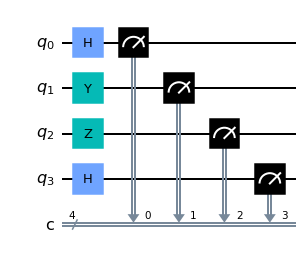

In [ ]:
from qiskit import QuantumCircuit, Aer
import numpy as np
import qiskit.quantum_info as qi
qc = QuantumCircuit(4,4) # Ponemos 4 qubits y 4 bits
# Aplicamos algunas compuertas
qc.h(0)
qc.y(1)
qc.z(2)
qc.h(3)
stv = qi.Statevector.from_instruction(qc)
# Ahora hacemos mediciones de cada qubit
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.draw(output='mpl')

Las compuertas cuánticas aplicadas se expresan matemáticamente del modo siguiente:

$$ 
\begin{align*} (H \otimes Z \otimes Y \otimes X) |0000\rangle =\frac{\ket{0}+\ket{1}}{\sqrt{2}} \otimes|0\rangle\otimes i|1\rangle\otimes |1\rangle = \frac{i}{\sqrt{2}}|0011\rangle+ \frac{i}{\sqrt{2}}|1011\rangle
\end{align*}
$$


El mismo resultado se obtiene con qiskit   para el  estado del sistema antes de las mediciones con la líneas 

*stv = qi.Statevector.from_instruction(qc)* 

y 

*stv.draw('latex', prefix="|\\psi\\rangle =")* 



In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

Enseguida simulamos este circuito usando el *backend qasm_simulator* y mostramos los resultados estadísticos de ejecutarlo muchas veces.

Nota: La notación de *qiskit* pone el qubit más significativo a la izquierda igual que en los números binarios.

{'1011': 249, '0011': 259, '0010': 230, '1010': 262}


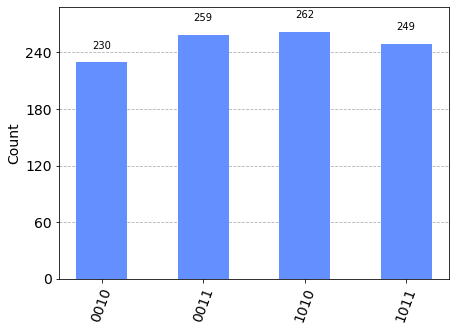

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1000)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

## **2.3 Circuito Cuántico para Superposición Simétrica**

Para poner en superposición uniforme a todos los qubits aplicamos la compuerta de Hadamard a todos los qubits

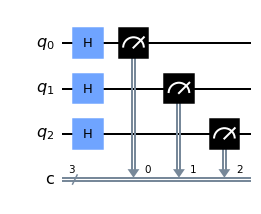

In [ ]:
from qiskit import QuantumCircuit 
import qiskit.quantum_info as qi
qc = QuantumCircuit(3,3)
for qubit in range(3):
  qc.h(qubit)
stv = qi.Statevector.from_instruction(qc)
for qubit in range(3):
  qc.measure(qubit,qubit)
qc.draw("mpl")

Las compuertas cuánticas aplicadas se expresan matemáticamente del modo siguiente:

$$ 
\begin{align*} (H \otimes H \otimes H ) |000\rangle =\frac{\ket{0}+\ket{1}}{\sqrt{2}} \otimes\frac{\ket{0}+\ket{1}}{\sqrt{2}}\otimes \frac{\ket{0}+\ket{1}}{\sqrt{2}} 
\end{align*}
$$

$$ 
\begin{align*} 
= \frac{1}{2\sqrt{2}}(|000\rangle+ |001\rangle+ |010\rangle+ |011\rangle+ |100\rangle+ |101\rangle+ |110\rangle+ |111\rangle)
\end{align*}
$$


Usando qiskit obtenemos el mismo resultado para el estado del sistema antes de las mediciones:

In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>


Noten que si aplicamos un operador al estado cuántico $|\psi\rangle$ lo estamos aplicando simultaneamente a todos los estados 

$|000\rangle$,$|001\rangle$, ...., $|111\rangle$. 

Esto se llama **paralelismo cuántica** y es una de la ventajas de la computación cuántica. 

Enseguida simulamos este circuito

{'110': 118, '101': 148, '001': 135, '100': 116, '111': 130, '011': 129, '010': 105, '000': 119}


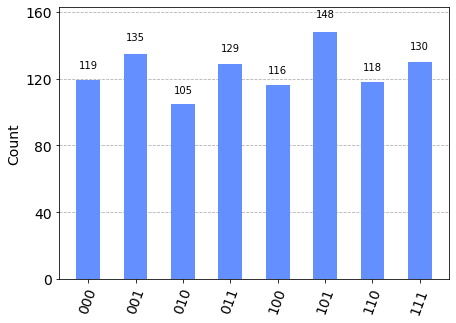

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1000)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

## **2.4 Circuito Cuántico para el Experimento de los 3 Polarizadores**

<img src="https://3b1b-posts.us-east-1.linodeobjects.com//content/lessons/2017/light-quantum-mechanics/brighter_venn_diagram.png" alt="Alternative text" />

Fuente: https://www.3blue1brown.com/lessons/light-quantum-mechanics

Empezamos con 1000 fotones polarizados verticalmente, que representamos por su qubit en el estado $|0\rangle$ y los medimos con un polarizador a 90 grados que equivale a medir el qubit en el estado $|1\rangle$ (rotado 180 grados)

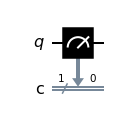

In [ ]:
from qiskit import QuantumCircuit, Aer
import qiskit.quantum_info as qi
qc = QuantumCircuit(1,1)
qc.measure(0,0)
qc.draw("mpl")

{'0': 1000}


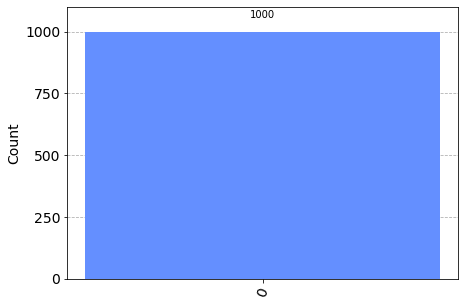

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1000)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

Vemos que no llega ningún qubit en el estado $|1\rangle$ (todos llegan con el mismo estado $|0\rangle$).

Otra base posible es la base X dada por

$|+\rangle =\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$

y

$|-\rangle =\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$


Vemos que 

$|0\rangle =\frac{1}{\sqrt{2}}(|+\rangle+|-\rangle)$

y

$|1\rangle =\frac{1}{\sqrt{2}}(|+\rangle-|-\rangle)$

Es decir que la probabilidad de medir 

$|+\rangle$ para un estado  $|0\rangle$

es del 50%

y la probabilidad de volver a medir  

$|0\rangle$ para un estado  $|+\rangle$

es otra vez del 50%

Colocar el polarizador de enmedio a 45 grados equivale a hacer la medición en la
base X.


Ahora hacemos una medición intermedia en una base rotada 90 grados en el plano XZ (base X) .

Requerimos entender cómo hacer una medición en bases rotadas a ángulos arbitrarios $\theta$ y $\phi$.

Partiendo de los 2 estados cuánticos ortogonales 
$$
|\psi\rangle = \cos({\frac{\theta}{2}})|0\rangle +e^{i\phi} \sin({\frac{\theta}{2}})|1\rangle=\begin{pmatrix} \cos({\frac{\theta}{2}}) \\\\ e^{i\phi}\sin({\frac{\theta}{2}}) \end{pmatrix} 
$$
y

$$
|\psi^{'}\rangle =\cos({\frac{\pi-\theta}{2}})|0\rangle +e^{i(\pi+\phi)} \sin({\frac{\pi-\theta}{2}})|1\rangle=\begin{pmatrix} \sin({\frac{\theta}{2}}) \\\\ -e^{i\phi}\cos({\frac{\theta}{2}}) \end{pmatrix} 
$$

vemos que los operadores unitarios de rotación 


$$R_Y(\theta) = \exp\left(-i \frac{\theta}{2} Y\right) =
    \begin{pmatrix}
        \cos{\frac{\theta}{2}} & -\sin{\frac{\theta}{2}} \\
        \sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
$$

y

$$R_Z(\phi) = \exp\left(-i \frac{\phi}{2} Z\right) =
    \begin{pmatrix}
        e^{-i\phi/2} & 0 \\
       0 & e^{i\phi/2}
    \end{pmatrix}
$$



transforman la base  $\{|\psi\rangle, |\psi^{'}\rangle\}$ en la base computacional
$\{|0\rangle, |1\rangle\}$ (salvo una fase)
$$
R_Y(-\theta) R_Z(-\phi)|\psi\rangle =\begin{pmatrix}
        \cos{\frac{\theta}{2}} & \sin{\frac{\theta}{2}} \\
        -\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
    \begin{pmatrix}
        e^{i\phi/2} & 0 \\
       0 & e^{-i\phi/2}
    \end{pmatrix}
    \begin{pmatrix} \cos({\frac{\theta}{2}}) \\\\ e^{i\phi}\sin({\frac{\theta}{2}}) \end{pmatrix} =e^{i\phi/2}
    \begin{pmatrix} 1 \\\\ 0 \end{pmatrix}
    =e^{i\phi/2}|0\rangle
$$
$$
R_Y(-\theta) R_Z(-\phi)|\psi^{'}\rangle =\begin{pmatrix}
        \cos{\frac{\theta}{2}} & \sin{\frac{\theta}{2}} \\
        -\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
    \begin{pmatrix}
        e^{i\phi/2} & 0 \\
       0 & e^{-i\phi/2}
    \end{pmatrix}
    \begin{pmatrix} \sin({\frac{\theta}{2}}) \\\\ -e^{i\phi}\cos({\frac{\theta}{2}}) \end{pmatrix}  =e^{i\phi/2}
    \begin{pmatrix} 0 \\\\ 1 \end{pmatrix}
    =e^{i\phi/2}|1\rangle
$$

De modo que para medir un qubit en la base $\{|\psi\rangle, |\psi^{'}\rangle\}$ basta con aplicar $R_Y(-\theta) R_Z(-\phi)$ a ese qubit justo antes de medirlo en la base computacional $\{|0\rangle, |1\rangle\}$ de Qiskit.

En este caso $\theta=\pi/2$ y $\phi=0$. 

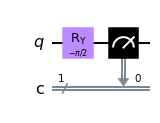

In [ ]:
from qiskit import QuantumCircuit 
import qiskit.quantum_info as qi
import numpy as np
qc = QuantumCircuit(1,1)
qc.ry(-np.pi/2,0)
stv = qi.Statevector.from_instruction(qc)

qc.measure(0,0)
qc.draw("mpl")

In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

{'0': 471, '1': 529}


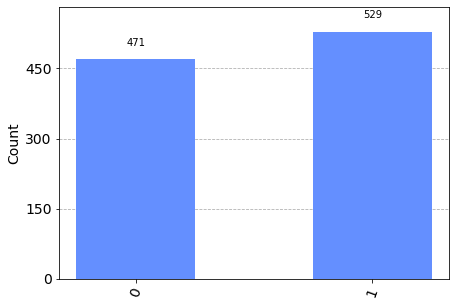

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1000)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

Vemos que 471 pasan el filto de que están en el estado $|+\rangle =\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$

Enseguida empezamos con esos 471 qubits y los medimos en la base computacional que equivale a pasar los fotones por el tercer polarizador.

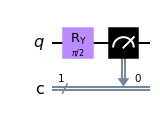

In [ ]:
from qiskit import QuantumCircuit 
import qiskit.quantum_info as qi
qc = QuantumCircuit(1,1)
qc.ry(np.pi/2,0)
stv = qi.Statevector.from_instruction(qc)

qc.measure(0,0)
qc.draw("mpl")

In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

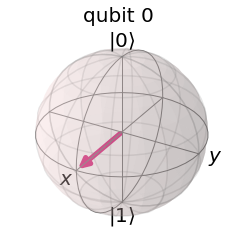

In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(stv)

{'1': 241, '0': 230}


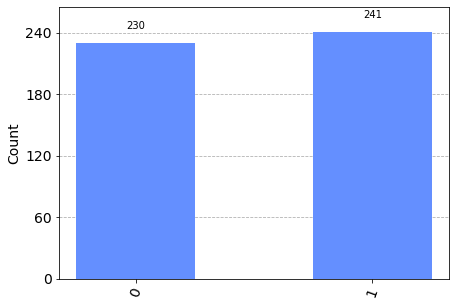

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=471)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

Vemos que en promedio un 25% pasan el tercer filtro de que están en el estado $|1\rangle$

## **2.5. Uso de una Computadora Cuántica Real de IBM Quantum Experience**

Lo primero es registrarse en


https://quantum-computing.ibm.com/

Una vez que el email se verifica ya tendremos una CLAVE de acceso y la guardamos con

In [ ]:
from qiskit import IBMQ
#IBMQ.save_account('CLAVE', overwrite=True)


Para obtener la lista de computadoras reales disponibles usar el código siguiente:


In [ ]:
from qiskit import IBMQ
IBMQ.load_account() # Load account from disk
print(IBMQ.providers())    # List all available providers
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

## **2.6 Cálculo de Valores de Expectación de Operadores**

Primero definimos el estado cuántico $|\psi\rangle$ y el operador usando **qiskit.opflow**.

Por ejemplo para calcular 
$$
\langle\psi|X\otimes X\otimes X|\psi\rangle
$$  

para 
$$  |\psi\rangle =\frac{\ket{000}+\ket{111}}{\sqrt{2}}$$

lo podemos hacer del modo siguiente en Qiskit.




In [ ]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp,Zero, One, Z, X,Y,I
import numpy as np
psi = 1 / np.sqrt(2) * ((One ^ One^ One) + (Zero ^ Zero^ Zero))
qc=QuantumCircuit(3)
qc.x(0)
qc.x(1)
qc.x(2)
op=CircuitOp(qc)
from IPython.display import display, Latex,Math
display(Math('|\psi> = \\frac{1}{\sqrt{2}}(|0>|0>|0>+|1>|1>|1>)'))
display(Latex(f'$<\psi|X\otimes X\otimes X|\psi>$'))
print("=",np.round(psi.adjoint().compose(op).compose(psi).eval().real,1))

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

= 1.0


O simplificarlo más en la definición del operador, como se muestra a continuación

In [ ]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp,Zero, One, Z, X,Y,I
import numpy as np
psi = 1 / np.sqrt(2) * ((One ^ One^ One) + (Zero ^ Zero^ Zero))
op = X^X^X
from IPython.display import display, Latex,Math
display(Math('|\psi> = \\frac{1}{\sqrt{2}}(|0>|0>|0>+|1>|1>|1>)'))
display(Latex(f'$<\psi|Op|\psi>$'))
print("=",np.round(psi.adjoint().compose(op).compose(psi).eval().real,1))


<IPython.core.display.Math object>

<IPython.core.display.Latex object>

= 1.0


Por ejemplo para calcular 
$$
\langle\psi|XX+YY+ZZ|\psi\rangle
$$  

para 
$$  |\psi\rangle =\ket{0}$$

lo podemos hacer del modo siguiente:


In [ ]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp,Zero, One, Z, X,Y,I
import numpy as np
psi = Zero 
op =   Z
from IPython.display import display, Latex,Math
display(Math('|\psi> = |0>'))
display(Latex(f'$<\psi|Op^\dag Op|\psi>$'))
print("=",np.round(psi.adjoint().compose(op.adjoint()).compose(op).compose(psi).eval().real,1))


<IPython.core.display.Math object>

<IPython.core.display.Latex object>

= 1.0


De modo que 
$$
\langle\psi|XX+YY+ZZ|\psi\rangle = 3
$$  

para 
$$  |\psi\rangle =\ket{0}$$


Recuérdese que el operador de spin es
$$
S= \frac{\hbar}{2}(\hat iX+\hat jY+\hat kZ)
$$


Para un electrón es
$$
S^2 \mid s,m_z\rangle = s(s+1) \hbar^2 \mid s,m_z\rangle=\frac{3}{4}\hbar^2 \mid s,m_z\rangle
$$
con $s=\frac{1}{2}$


Por ejemplo podemos calcular 
$$
\langle\psi|(S_1+S_2)^2|\psi\rangle = \langle\psi|(S_1^2+S_2^2+2S_1\cdot S_2)|\psi\rangle=0
$$  

para 
$$  |\psi\rangle =\frac{\ket{01}-\ket{10}}{\sqrt{2}}$$

y 
$$
\langle\psi|(S_1+S_2)^2|\psi\rangle = \langle\psi|(S_1^2+S_2^2+2S_1\cdot S_2)|\psi\rangle=8 \frac{\hbar^2}{4} = 2 \hbar^2
$$  

para 
$$  |\psi\rangle =\frac{\ket{00}+\ket{11}}{\sqrt{2}}$$
$$  |\psi\rangle =\frac{\ket{00}-\ket{11}}{\sqrt{2}}$$
$$  |\psi\rangle =\frac{\ket{01}+\ket{10}}{\sqrt{2}}$$

lo podemos hacer del modo siguiente:


In [ ]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp,Zero, One, Z, X,Y,I
import numpy as np
psi = 1 / np.sqrt(2) *((Zero ^ Zero) + (One ^ One)) # triplet
#psi = 1 / np.sqrt(2) *((Zero ^ Zero) - (One ^ One)) # triplet
#psi = 1 / np.sqrt(2) *((Zero ^ One) + (One ^ Zero)) # triplet
#psi = 1 / np.sqrt(2) *((Zero ^ One) - (One ^ Zero#)) # singlet
op =   X^X
#op =   Y^Y
#op =   Z^Z
from IPython.display import display, Latex,Math
display(Latex(f'$<\psi| Op|\psi>$'))
print("=",np.round(psi.adjoint().compose(op).compose(psi).eval().real,1))


<IPython.core.display.Latex object>

= -1.0



De modo que el spin total para los estados triplete de 2 electrones es
$$
S^2 \mid s,m_z\rangle = s(s+1) \hbar^2 \mid s,m_z\rangle
$$
con $s=1$

y para el estado singlete

$$
S^2 \mid s,m_z\rangle = s(s+1) \hbar^2 \mid s,m_z\rangle
$$
con $s=0$

# **3. Entrelazamiento de 2 Qubits. Estados de Bell**

Los 3 estados de Bell son los siguientes:
$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|0\rangle \otimes |0\rangle + |1\rangle \otimes |1\rangle) \\
|\Phi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle \otimes |0\rangle - |1\rangle \otimes |1\rangle) \\
|\Psi^+\rangle = \frac{1}{\sqrt{2}} (|0\rangle \otimes |1\rangle + |1\rangle \otimes |0\rangle) \\
|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle \otimes |1\rangle - |1\rangle \otimes |0\rangle)
$$

o bien

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|0\rangle |0\rangle + |1\rangle  |1\rangle) \\
|\Phi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle  |0\rangle - |1\rangle  |1\rangle) \\
|\Psi^+\rangle = \frac{1}{\sqrt{2}} (|0\rangle |1\rangle + |1\rangle  |0\rangle) \\
|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle  |1\rangle - |1\rangle  |0\rangle)
$$

Normalmente se usa la siguiente notación simplificada:

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

$$  \ket{\Phi^+} =\frac{\ket{00}+\ket{11}}{\sqrt{2}}$$

$$  \ket{\Phi^-} =\frac{\ket{00}-\ket{11}}{\sqrt{2}}$$

$$  \ket{\Psi^+} =\frac{\ket{01}+\ket{10}}{\sqrt{2}}$$

$$  \ket{\Psi^-} =\frac{\ket{01}-\ket{10}}{\sqrt{2}}$$

Por ejemplo, para **crear el primer estado de Bell** se usa el circuito siguiente:

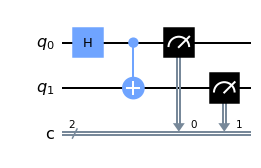

In [ ]:
from qiskit import QuantumCircuit, Aer,execute
import qiskit.quantum_info as qi
qc = QuantumCircuit(2,2) # Ponemos 2 qubits y 2 bits
# Aplicamos algunas compuertas
qc.h(0) # Hadamard gate 
qc.cx(0,1) # CNOT gate
stv = qi.Statevector.from_instruction(qc)
for qubit in range(2):
  qc.measure(qubit,qubit)
qc.draw("mpl")

Las compuertas cuánticas aplicadas se expresan matemáticamente del modo siguiente:

$$ 
\begin{align*} (CNOT  )(I \otimes H  ) |00\rangle =(CNOT  )\ket{0}\otimes\frac{\ket{0}+\ket{1}}{\sqrt{2}} = \frac{1}{\sqrt{2}}(CNOT)( |00\rangle+|01\rangle) = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)
\end{align*}
$$


Usando qiskit vemos que el estado del sistema antes de las mediciones es el mismo que acabamos de obtener:

---



In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

Enseguida simulamos este circuito

{'11': 520, '00': 480}


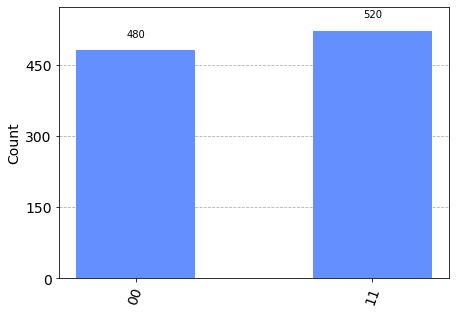

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1000)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

El circuito para crear el segundo estado de Bell es

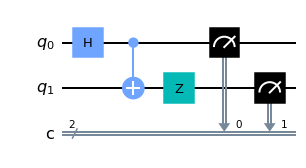

In [ ]:
from qiskit import QuantumCircuit, Aer,execute
import qiskit.quantum_info as qi
qc = QuantumCircuit(2,2) # Ponemos 2 qubits y 2 bits
qc.h(0) # Hadamard gate 
qc.cx(0,1) # CNOT gate
qc.z(1) # NOT gate
stv = qi.Statevector.from_instruction(qc)
for qubit in range(2):
  qc.measure(qubit,qubit)
qc.draw("mpl")

In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

{'11': 476, '00': 524}


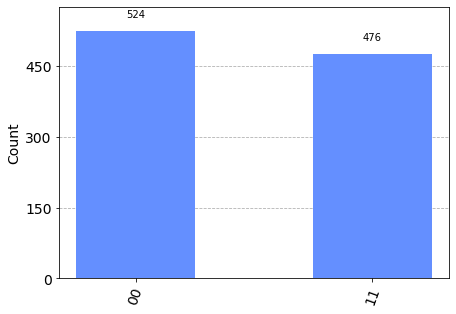

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1000)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

El circuito para crear el tercer estado de Bell es

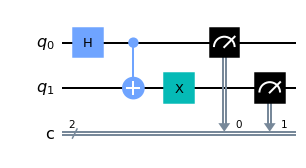

In [ ]:
from qiskit import QuantumCircuit, Aer,execute
import qiskit.quantum_info as qi
qc = QuantumCircuit(2,2) # Ponemos 2 qubits y 2 bits
qc.h(0) # Hadamard gate 
qc.cx(0,1) # CNOT gate
qc.x(1) # NOT gate
stv = qi.Statevector.from_instruction(qc)
for qubit in range(2):
  qc.measure(qubit,qubit)
qc.draw("mpl")

In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

{'01': 486, '10': 514}


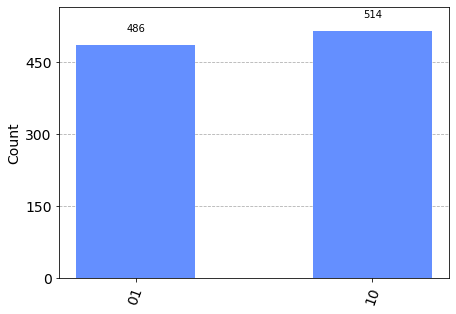

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1000)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

Finalmente, el circuito para crear el cuarto estado de Bell es

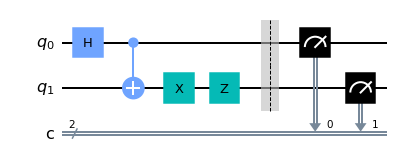

In [ ]:
from qiskit import QuantumCircuit, Aer,execute
import qiskit.quantum_info as qi
qc = QuantumCircuit(2,2) # Ponemos 2 qubits y 2 bits
qc.h(0) # Hadamard gate 
qc.cx(0,1) # CNOT gate
qc.x(1) # NOT gate
qc.z(1) # Z gate
qc.barrier()
stv = qi.Statevector.from_instruction(qc)
for qubit in range(2):
  qc.measure(qubit,qubit)
qc.draw("mpl")

Nótese que podemos intercambiar las compuertas X y Z y obtener el mismo resultado (salvo una fase global).

In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

{'10': 520, '01': 480}


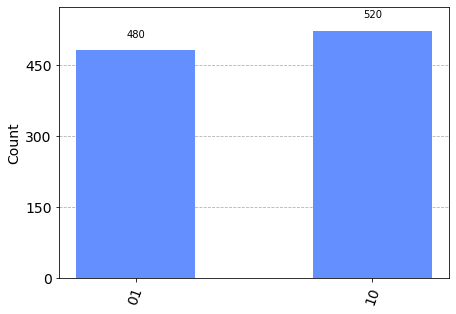

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1000)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

# **4. Entrelazamiento de 3 Qubits. Estado GHZ**

Para 3 qubits los estados equivalentes a los de Bell de máximo entrelazamiento se llaman estados de **Greenberger–Horne–Zeilinger**.

Tienen propiedades muy interesantes. Un ejemplo es

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

$$  \ket{GHZ} =\frac{\ket{000}+\ket{111}}{\sqrt{2}}$$

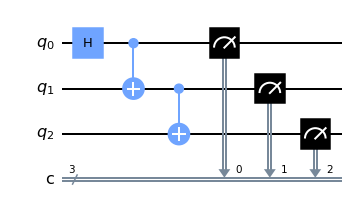

In [ ]:
from qiskit import QuantumCircuit, Aer,transpile
import qiskit.quantum_info as qi
qc = QuantumCircuit(3,3) # Ponemos 3 qubits y 3 bits
# Aplicamos algunas compuertas
qc.h(0) # Hadamard gate 
qc.cx(0,1) # CNOT gate
qc.cx(1,2) # CNOT gate
stv = qi.Statevector.from_instruction(qc)
for qubit in range(3):
  qc.measure(qubit,qubit)
qc.draw("mpl")

Las compuertas cuánticas aplicadas se expresan matemáticamente del modo siguiente:

$$ 
\begin{align*} (CNOT \otimes I)(I \otimes CNOT)(I \otimes I \otimes H ) |000\rangle =\frac{1}{\sqrt{2}} (CNOT \otimes I)(I \otimes CNOT)(\ket{000}+ \ket{001}) = \frac{1}{\sqrt{2}}(CNOT \otimes I)(\ket{000}+ \ket{011}) = \frac{1}{\sqrt{2}}(\ket{000}+ \ket{111})
\end{align*}
$$


El estado del sistema antes de las mediciones obtenido mediante qiskit es el mismo:

In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

Enseguida simulamos este circuito

{'000': 540, '111': 460}


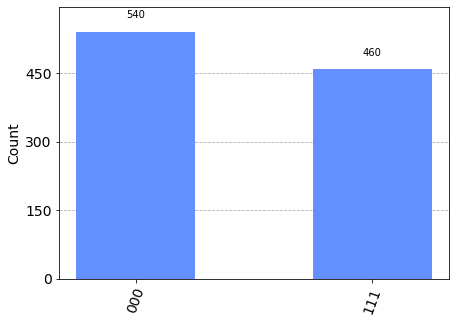

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1000)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

## **4.1 Estado GHZ con Ruido Simulado Acorde con una Computadora Real**

Basta con apuntar la variable **backend** a alguna computadora real específica de IBM Quantum Experience con
```
IBMQ.save_account('poner-la-clave-de IBMQ', overwrite=True)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila')
```
o a la más desocupada con

```
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
      and not x.configuration().simulator and x.status().operational==True))
```
y correr

```
noise_model = NoiseModel.from_backend(backend)
print("----------Noise Model for",backend,"--------------\n",noise_model)
sim_backend = AerSimulator.from_backend(backend)
tqc = transpile(qc, sim_backend,optimization_level=3)
job = sim_backend.run(tqc,shots=1000)
print("Counts for 3-qubit GHZ state with simulated noise model for", backend)
plot_histogram(job.result().get_counts())
```

In [ ]:
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy


Escogemos la computadora **ibmq_manila**.

In [ ]:
from qiskit import IBMQ, Aer
from qiskit_aer.noise import NoiseModel
#IBMQ.save_account('CLAVE', overwrite=True)

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila')
noise_model = NoiseModel.from_backend(backend)
print("----------Noise Model for",backend,"--------------\n",noise_model)

ibmqfactory.load_account:WARNING:2023-02-21 15:37:10,097: Credentials are already in use. The existing account in the session will be replaced.


----------Noise Model for ibmq_manila --------------
 NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['cx', 'x', 'id', 'reset', 'measure', 'sx']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (4, 3)), ('cx', (3, 4)), ('cx', (2, 3)), ('cx', (3, 2)), ('cx', (1, 2)), ('cx', (2, 1)), ('cx', (0, 1)), ('cx', (1, 0)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


O escogemos la más desocupada.

In [ ]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
      and not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)
noise_model = NoiseModel.from_backend(backend)
print("----------Noise Model for",backend,"--------------\n",noise_model)

least busy backend:  ibmq_lima
----------Noise Model for ibmq_lima --------------
 NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['cx', 'id', 'x', 'sx', 'reset', 'measure']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (4, 3)), ('cx', (3, 4)), ('cx', (0, 1)), ('cx', (1, 0)), ('cx', (3, 1)), ('cx', (1, 3)), ('cx', (2, 1)), ('cx', (1, 2)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


least busy backend:  aer_simulator(ibmq_manila)
Counts for 3-qubit GHZ state with simulated noise model for ibmq_manila


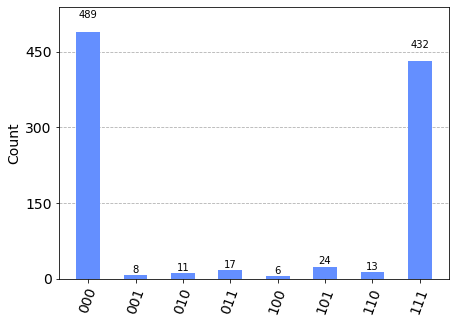

In [ ]:
sim_backend = AerSimulator.from_backend(backend)
print("least busy backend: ", sim_backend)

# Transpile the circuit for the noisy basis gates
tqc = transpile(qc, sim_backend,optimization_level=3)

# Execute noisy simulation and get counts
job = sim_backend.run(tqc,shots=1000)
print("Counts for 3-qubit GHZ state with simulated noise model for", backend)
plot_histogram(job.result().get_counts())

El diagrama modificado para esta computadora se llama circuito "transpilado"

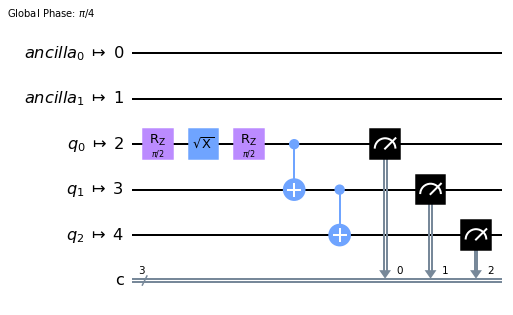

In [ ]:
tqc.draw("mpl")

## **4.2 Estado GHZ en una Computadora Real**

Basta con apuntar la variable **backend** a alguna computadora real específica de IBM Quantum Experience con
```
IBMQ.save_account('poner-la-clave-de IBMQ', overwrite=True)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila')
```
o a la más desocupada con
```
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
      and not x.configuration().simulator and x.status().operational==True))
```
y correr
```
tqc = transpile(qc, backend,optimization_level=3)
job = backend.run(tqc,shots=1000)
```
Después monitorear la ejecución con
```
from qiskit.providers.jobstatus import JobStatus
print(job.status(),job.queue_position())
```
y acceder a los resultados una vez que termina con
```
print("Counts for 3-qubit GHZ state with real computer", backend)
plot_histogram(job.result().get_counts())
```


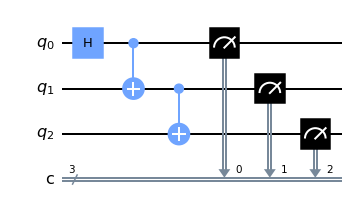

In [ ]:
from qiskit import QuantumCircuit, Aer,transpile
import qiskit.quantum_info as qi
qc = QuantumCircuit(3,3) # Ponemos 3 qubits y 3 bits
# Aplicamos algunas compuertas
qc.h(0) # Hadamard gate 
qc.cx(0,1) # CNOT gate
qc.cx(1,2) # CNOT gate
stv = qi.Statevector.from_instruction(qc)
for qubit in range(3):
  qc.measure(qubit,qubit)
qc.draw("mpl")

In [ ]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
tqc = transpile(qc, backend, optimization_level=3)
job = backend.run(tqc,shots = 100)

ibmqfactory.load_account:WARNING:2023-02-21 15:38:51,991: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_belem


In [ ]:
from qiskit.providers.jobstatus import JobStatus
print(job.status(),job.queue_position())

JobStatus.QUEUED 28


Counts for 3-qubit GHZ state with real computer ibmq_lima


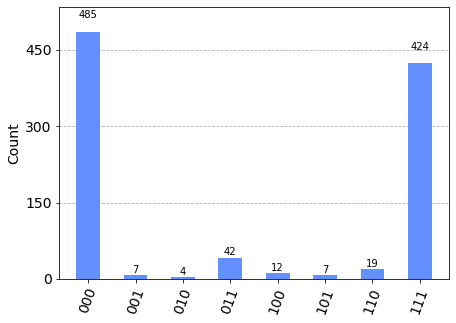

In [ ]:
print("Counts for 3-qubit GHZ state with real computer", backend)
plot_histogram(job.result().get_counts())

# **5. Teleportación Cuántica**


A la fecha se ha logrado teletransportar qubits a distancias mayores a 1000 Km a través de un satélite Chino. 

Vamos a suponer que Alice tiene un qubit arbitrario que quiere compartir a Bob. En Computación Cuántica es imposible hacer una copia de un qubit (teorema de no clonación), sin embargo se lo puede compartir a Bob a costa de destruir su qubit siguiendo el protocolo siguiente:

- Suponemos que el qubit que Alice quiere compartir es 

$$ |\psi \rangle = \alpha|0\rangle + \beta|1\rangle $$

- Alice y Bob le piden a Charly que cree un par de qubits entrelazados

- Charly de da uno de esos 2 qubits entrelazados a Alice y el otro a Bob.

- Para prósitos del circuito cuántico que haremos, vamos a llamar $q_0$ a $ |\psi \rangle $, $q_1$ al qubit entrelazado de Alice y $q_2$ al qubit entrelazado de Bob

- Alice aplica una compuerta CNOT a su par de qubits $q_1q_0$

- Alice aplica una compuerta Hadamard a su qubit $q_0$

- Alice mide sus dos qubits y le pasa los resultados $C_1C_0$ a Bob por un canal clásico (con velocidad < c)

- Dependiendo de los valores $C_1C_0$ Bob aplica las operaciones cuánticas siguientes a su qubit:

<div align="center">Si $C_1C_0 = 00$ no hace nada </div>

<div align="center">Si $C_1C_0 = 01$ aplica una compuerta Z </div>

<div align="center">Si $C_1C_0 = 10$ aplica una compuerta X </div>

<div align="center">Si $C_1C_0 = 11$ aplica las compuertas ZX </div>

A continuación vamos a programar este protocolo para simularlo. También lo podemos correr en alguna de las computadores cuánticas de IBM con alguna variante para corroborar que sí se llevó a cabo con éxito ya que no se puede conocer el estado inicial de $ |\psi \rangle$ ni el estado final de $q_2$ para compararlos(al medirlos se destruyen).





El qubit arbitrario que Alice quiere teleportar a Bob es el siguiente:

In [ ]:
import numpy as np
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import random_statevector
psi = random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))

<IPython.core.display.Latex object>

Su representación en la esfera de Bloch es


$$ |\psi \rangle = cos\frac{\theta}{2}|0\rangle + e^{i\phi}sin\frac{\theta}{2}|1\rangle $$


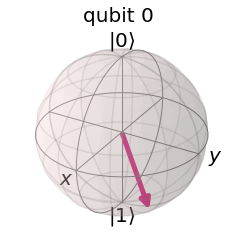

In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(psi)

Aplicando el protocolo llegamos al circuito cuántico siguiente:

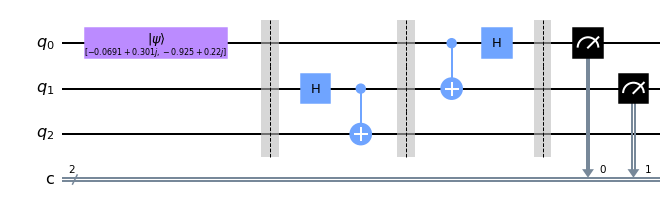

In [ ]:
from qiskit import QuantumCircuit, assemble, Aer
import qiskit.quantum_info as qi
import numpy as np
import qiskit.quantum_info as qi
qc = QuantumCircuit(3,2)
qc.initialize(psi, 0) 
stv0 = qi.Statevector.from_instruction(qc)
qc.barrier()
qc.h(1) # Hadamard  
qc.cx(1,2) # CNOT 
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
stv = qi.Statevector.from_instruction(qc)
qc.measure(0,0)
qc.measure(1,1)
qc.draw("mpl")


El estado de los 3 qubits al inicio es el siguiente. 

Como ya dijimos, los 2 primeros qubits ($q_1q_0$) los tiene Alce y el tercero ($q_2$) lo tiene Bob.

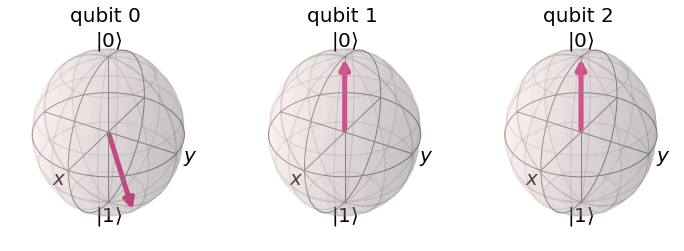

In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(stv0)

El estado del sistema justo antes de las mediciones de $q_0$ y de $q_1$ por Alice es:

In [ ]:
stv.draw('latex', prefix='Estado \quad del \quad sistema \quad de \quad 3 \quad qubits \quad = \quad')

<IPython.core.display.Latex object>

Ahora Alice mide sus 2 qubits obteniendo el resultado siguiente:

{'11': 1}


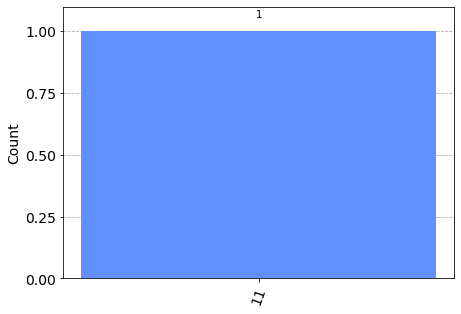

In [ ]:
from qiskit import QuantumCircuit, Aer,execute
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc,backend, shots=1)
print(job.result().get_counts(qc))
plot_histogram(job.result().get_counts())

Dependiendo del resultado de los 2 bits que Alice le manda, Bob aplica las compuertas cuánticas a su qubit.


In [ ]:
import qiskit.quantum_info as qi
import numpy as np
qc1 = QuantumCircuit(3,2)  
print(job.result().get_counts())
for key in job.result().data()["counts"]:
  if int(key,0) == 0 : 
    print("El resultado es 00")
    q2_state = [np.round(stv[0],3),np.round(stv[4],3)] 
    qc1.initialize(0, 0) 
    qc1.initialize(0, 1)   
  elif int(key,0) == 1 : 
    print("El resultado es 01")
    q2_state = [np.round(stv[1],3),np.round(stv[5],3)] 
    qc1.initialize(1, 0) 
    qc1.initialize(0, 1)    
  elif int(key,0) == 2 : 
    print("El resultado es 10")
    q2_state = [np.round(stv[2],3),np.round(stv[6],3)]
    qc1.initialize(0, 0) 
    qc1.initialize(1, 1)    
  elif int(key,0) == 3 : 
    print("El resultado es 11")
    q2_state = [np.round(stv[3],3),np.round(stv[7],3)]  
    qc1.initialize(1, 0) 
    qc1.initialize(1, 1)  
q2_normalizado = q2_state/np.linalg.norm(q2_state)
qc1.barrier()
qc1.initialize(q2_normalizado, 2) 
for key in job.result().data()["counts"]:
  if int(key,0) == 1 : 
    qc1.z(2)
  if int(key,0) == 2 : 
    qc1.x(2)
  if int(key,0) == 3 : 
    qc1.x(2)
    qc1.z(2)
  
stv1 = qi.Statevector.from_instruction(qc1)
stv1.draw('latex', prefix='Estado \quad del \quad qubit \quad 2 = ')

{'11': 1}
El resultado es 11


<IPython.core.display.Latex object>


Vemos que en efecto el qubit de Bob se transforma en el qubit $$ |\psi \rangle = \alpha|0\rangle + \beta|1\rangle $$ que Alice le teleportó.

El estado final de los 3 qubits es el siguiente:

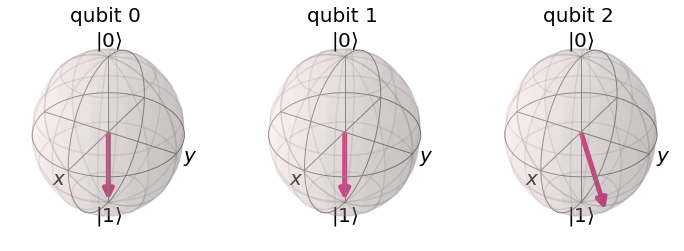

In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(stv1)


El circuito cuántico completo de la teleportación en este caso es el siguiente:

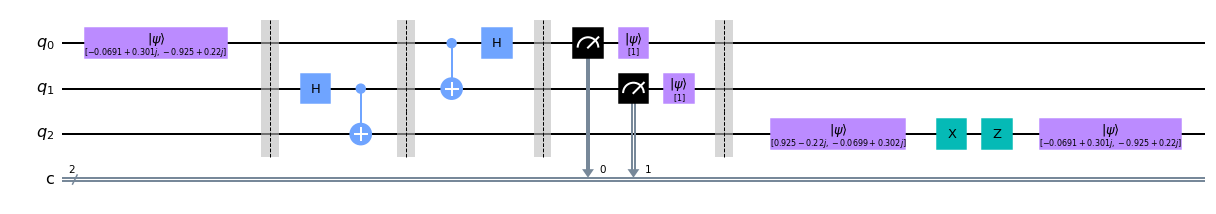

In [ ]:
import qiskit.quantum_info as qi
import numpy as np
qc2 = QuantumCircuit(3,2) 
for key in job.result().data(qc)["counts"]:
  if int(key,0) != 0 : 
    qc2.initialize(psi, 2)
qcc = qc.compose(qc1)  
qc3 = qcc.compose(qc2)  
qc3.draw("mpl")

##  **5.1 Sustento Matemático del Protocolo de Teleportación Cuántica**


- Suponemos que el qubit que Alice quiere compartir es 

$$ \alpha|0\rangle + \beta|1\rangle $$

- Alice y Bob le piden a Charly que cree un par de qubits entrelazados

$$  \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) $$

- Charly le da uno de esos 2 qubits entrelazados (el de la derecha) a Alice y el otro a Bob 


- El estado cuántico de los 3 qubits se obtiene haciendo el producto tensorial en el que Alice posee los dos primeros qubits y Bob el tercero. 

$$ \begin{align*}
\frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)\otimes ( \alpha|0\rangle+ \beta |1\rangle \\
&= \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|110\rangle + \beta|001\rangle + \beta|111\rangle) 
\end{align*}$$

- Recordemos que 

$$ CNOT \ket{00}= \ket{00}$$
$$ CNOT \ket{01}= \ket{11}$$
$$ CNOT \ket{10}= \ket{10}$$
$$ CNOT \ket{11}= \ket{01}$$


- Siguiendo el protocolo Alice aplica una compuerta CNOT a su par de qubits  $𝑞_1𝑞_0$ y enseguida una compuerta Hadamard a su qubit  $𝑞_0$. 

El resultado del estado cuántico de los 3 qubits es el siguiente:

$$ 
\begin{align*} (I \otimes I \otimes H) (I \otimes CNOT) \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|110\rangle + \beta|001\rangle + \beta|111\rangle) \\
&= (I \otimes I \otimes H) \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|110\rangle + \beta|011\rangle + \beta|101\rangle) \\
&= \frac{1}{2}  (\alpha(|000\rangle + |001\rangle + |110\rangle + |111\rangle) + \beta(|010\rangle - |011\rangle + |100\rangle - |101\rangle)) \\
\end{align*}
$$

que se puede reescribir como

$$
\begin{align*}
= \frac{1}{2}( (\alpha|0\rangle + \beta|1\rangle)\otimes|00\rangle  
+ (\alpha|1\rangle - \beta|0\rangle)\otimes|01\rangle   + (\alpha|1\rangle + \beta|0\rangle)\otimes|10\rangle  
 + (\alpha|1\rangle - \beta|0\rangle)\otimes|11\rangle  )
\end{align*}
$$

- Enseguida Alice mide sus 2 qubits y le manda el resultado de los 2 bits a través de un canal clásico 
 
Alice obtiene como resultado uno de los cuatro posibles resultados  $|00\rangle, |01\rangle, |10\rangle,$ o $|11\rangle$ con la misma probabilidad.  

El qubit de Bob se proyectará en uno de los 4 estados siguientes:

$$ |00\rangle \rightarrow (\alpha|0\rangle + \beta|1\rangle)$$

$$|01\rangle \rightarrow (\alpha|1\rangle - \beta|0\rangle)$$

$$|10\rangle \rightarrow (\alpha|1\rangle + \beta|0\rangle)$$

$$|11\rangle \rightarrow (\alpha|1\rangle - \beta|0\rangle)$$

- Recordemos que

$$ X \ket{0} = \ket{1}$$
$$ X \ket{1} = \ket{0}$$

y


$$ Z \ket{0}= \ket{0} $$
$$ Z \ket{1}= -\ket{1} $$


- Dependiendo de los valores $C_1C_0$ Bob aplica las operaciones cuánticas siguientes a su qubit:


<div align="center">Si $C_1C_0 = 00$ Bob no hace nada </div>

<div align="center">Si $C_1C_0 = 01$ Bob aplica una compuerta Z a su qubit</div> 

<div align="center">Si $C_1C_0 = 10$ Bob aplica una compuerta X a su qubit</div>

<div align="center">Si $C_1C_0 = 11$ Bob aplica las compuertas ZX a su qubit </div>

- Al final el estado del qubit de Bob será 

<div align="center"> $|q_2\rangle= \alpha|0\rangle + \beta|1\rangle$ </div>

## 5.2 **Teleportación Cuántica en una Computadora Real**

Apuntamos la variable **backend** a alguna computadora real específica de IBM Quantum Experience con
```
IBMQ.save_account('poner-la-clave-de IBMQ', overwrite=True)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila')
```
o a la más desocupada con
```
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
      and not x.configuration().simulator and x.status().operational==True))
```
hacemos la transpilación del circuito y lo ejecutamos
```
tqc = transpile(qc, backend,optimization_level=3)
job = backend.run(tqc,shots=1000)
```
Después monitoreamos la ejecución con
```
from qiskit.providers.jobstatus import JobStatus
print(job.status(),job.queue_position())
```
y accedemos a los resultados una vez que termina con
```
print("Counts for 3-qubit GHZ state with real computer", backend)
plot_histogram(job.result().get_counts())
```
Dado que en una computadora real no se permite por el momento dar más instrucciones después de alguna medición, vamos a adaptar el código de la teleportación general que vimos en la sección anterior para teleportar solamente cuando Alice mide $\ket{00}$ en sus dos qubit e ignoramos los otros 3 casos.

El circuito siguiente incluye la generación aleatoria mediante los ángulos $\theta$ y $\phi$ del qubit que se desea teleportar.

$$
|\psi\rangle = \cos({\frac{\theta}{2}})|0\rangle +e^{i\phi} \sin({\frac{\theta}{2}})|1\rangle=\begin{pmatrix} \cos({\frac{\theta}{2}}) \\\\ e^{i\phi}\sin({\frac{\theta}{2}}) \end{pmatrix} 
$$

vemos que los operadores unitarios de rotación 


$$R_Y(\theta) = \exp\left(-i \frac{\theta}{2} Y\right) =
    \begin{pmatrix}
        \cos{\frac{\theta}{2}} & -\sin{\frac{\theta}{2}} \\
        \sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
$$

y

$$R_Z(\phi) = \exp\left(-i \frac{\phi}{2} Z\right) =
    \begin{pmatrix}
        e^{-i\phi/2} & 0 \\
       0 & e^{i\phi/2}
    \end{pmatrix}
$$



nos permiten transformar $|0\rangle$ en  $|\psi\rangle$ (hasta un factor de fase) como se muestra a continuación
$$
R_Z(\phi) R_Y(\theta) |0\rangle =\begin{pmatrix}
        e^{-i\phi/2} & 0 \\
       0 & e^{i\phi/2}
    \end{pmatrix}
\begin{pmatrix}
        \cos{\frac{\theta}{2}} & -\sin{\frac{\theta}{2}} \\
        \sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
\end{pmatrix}
    \begin{pmatrix}1 \\\\ 0 \end{pmatrix} =
    \begin{pmatrix} e^{-i\phi/2}\cos{\frac{\theta}{2}} \\\\ e^{i\phi/2}\sin{\frac{\theta}{2}}  \end{pmatrix}
    =e^{-i\phi/2}|\psi\rangle
$$



theta = 0.94 rad,   theta = 54.07 grados
phi= 0.12 rad,   phi = 7.08 grados


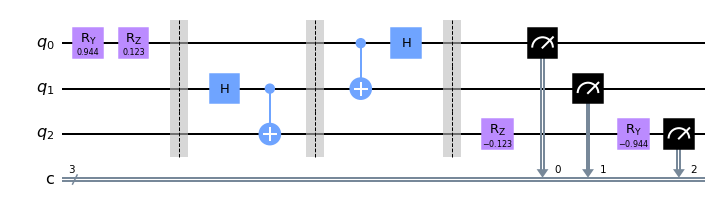

In [ ]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit import IBMQ, transpile
from qiskit.providers.ibmq import least_busy
from qiskit.tools.visualization import plot_histogram

import qiskit.quantum_info as qi
import numpy as np
import qiskit.quantum_info as qi
theta=np.pi*np.random.rand()
phi = 2*np.pi*np.random.rand()
print("theta =",np.round(theta,2),"rad,   theta =",np.round(180*theta/np.pi,2),"grados")
print("phi=",np.round(phi,2),"rad,   phi =",np.round(180*phi/np.pi,2),"grados")
qc = QuantumCircuit(3,3)
qc.ry(theta,0)
qc.rz(phi,0)
stv0 = qi.Statevector.from_instruction(qc)
qc.barrier()
qc.h(1) # Hadamard  
qc.cx(1,2) # CNOT 
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()

qc.rz(-phi,2)
qc.ry(-theta,2)
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.draw("mpl")

Los 3 qubits en la primera barrera son

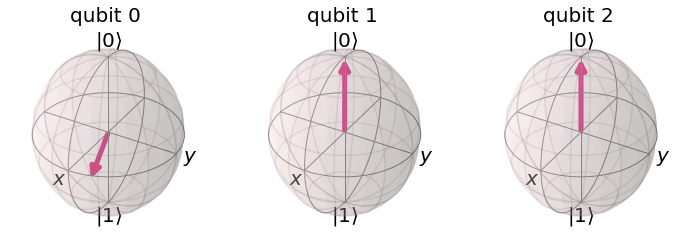

In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(stv0)

Primero simulamos el circuito

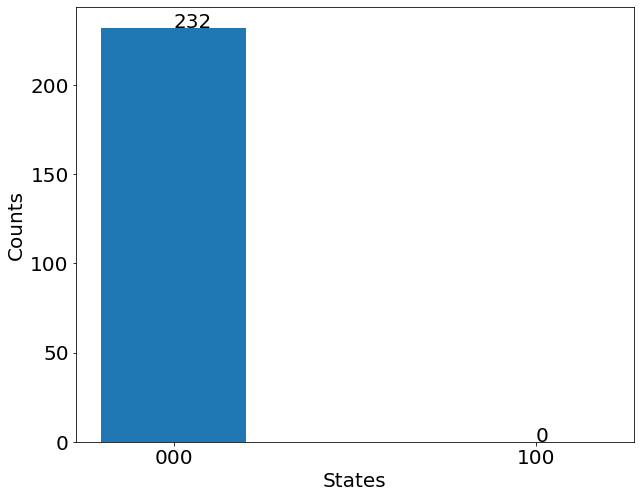

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc,backend, shots=1000)
#print(job.result().get_counts(qc))
try :
  n_error = job.result().get_counts(qc)['100']
except:
  n_error = 0
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))

states = ['000', '100']
counts = [job.result().get_counts(qc)['000'],n_error]
plt.rcParams.update({'font.size': 20})
plt.bar(states,counts,width=0.4, bottom=None,align='center', data=None)
for index, value in enumerate(counts):
    plt.text(index, value, str(value),fontsize=20)
plt.xlabel('States',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.show()

#plot_histogram(job.result().get_counts())

Vemos que en el caso que nos interesa, que es cuando los 2 primeros qubits están en $\ket{00}$, el tercer qubit siempre está en $\ket{0}$, es decir que el estado $\ket{100}$ no aparece en la medición, de modo que la teleportación de $\ket{\psi}$ es perfecta ya que los dos operadores de rotación apicados al final siempre transforman  $|\psi\rangle$ en 
$|0\rangle$ (salvo una fase)
$$
R_Y(-\theta) R_Z(-\phi)|\psi\rangle =\begin{pmatrix}
        \cos{\frac{\theta}{2}} & \sin{\frac{\theta}{2}} \\
        -\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
    \begin{pmatrix}
        e^{i\phi/2} & 0 \\
       0 & e^{-i\phi/2}
    \end{pmatrix}
    \begin{pmatrix} \cos({\frac{\theta}{2}}) \\\\ e^{i\phi}\sin({\frac{\theta}{2}}) \end{pmatrix} =e^{i\phi/2}
    \begin{pmatrix} 1 \\\\ 0 \end{pmatrix}
    =e^{i\phi/2}|0\rangle
$$

Ahora lo ejecutamos en una computadora con ruido similar al de una computadora real

configrc.store_credentials:WARNING:2023-02-23 09:43:51,376: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-02-23 09:43:51,590: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  aer_simulator(ibmq_manila) 




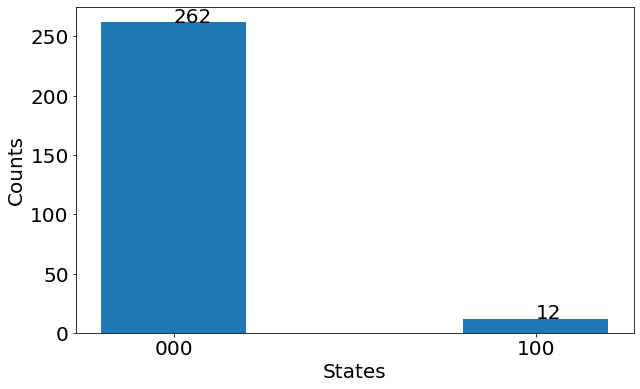

In [ ]:
from qiskit_aer import AerSimulator

IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
sim_backend = AerSimulator.from_backend(backend)
print("least busy backend: ", sim_backend,"\n\n")

# Transpile the circuit for the noisy basis gates
tqc = transpile(qc, sim_backend,optimization_level=3)

# Execute noisy simulation and get counts
job = sim_backend.run(tqc,shots=1000)
try :
  n_error = job.result().get_counts(qc)['100']
except:
  n_error = 0
import matplotlib.pyplot as plt
try :
  n_error = job.result().get_counts(qc)['100']
except:
  n_error = 0
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))

states = ['000', '100']
counts = [job.result().get_counts(qc)['000'],n_error]
plt.rcParams.update({'font.size': 20})
plt.bar(states,counts,width=0.4, bottom=None,align='center', data=None)
for index, value in enumerate(counts):
    plt.text(index, value, str(value),fontsize=20)
plt.xlabel('States',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.show()



Vemos que la teleportación ya no es perfecta como lo evidencia la presencia del estado $|100\rangle$ en la medición.

El diagrama transpilado es el siguiente

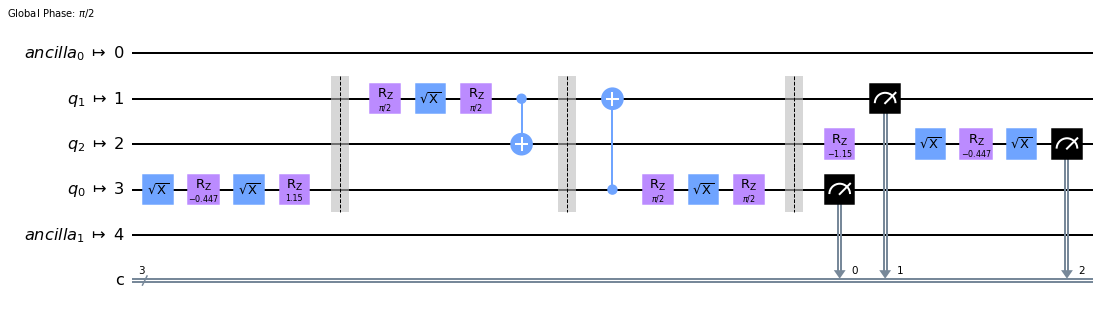

In [ ]:
tqc.draw("mpl")

Ahora lo ejecutamos en una computadora real

In [ ]:
from qiskit import QuantumCircuit, Aer,execute
from qiskit.visualization import plot_histogram
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
tqc = transpile(qc, backend, optimization_level=3)
job_teleportation = backend.run(tqc,shots = 1000)


ibmqfactory.load_account:WARNING:2023-02-23 09:32:49,890: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_manila


Monitoreamos su avance en la fila con

In [ ]:
print(job_teleportation.status(),job_teleportation.queue_position())

NameError: ignored

Al terminar accedemos a los datos con

{'000': 250, '001': 108, '010': 115, '011': 13, '100': 19, '101': 126, '110': 125, '111': 244}


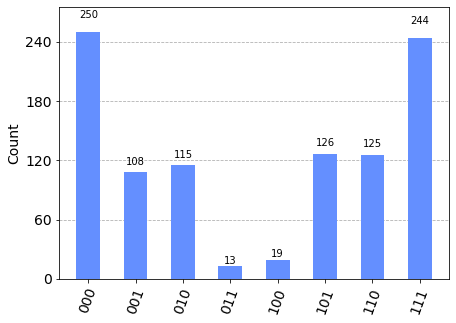

In [ ]:
print(job_teleportation.result().get_counts(),"\n\n")
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
states = ['000', '100']
counts = [job.result().get_counts(qc)['000'],n_error]
plt.rcParams.update({'font.size': 20})
plt.bar(states,counts,width=0.4, bottom=None,align='center', data=None)
for index, value in enumerate(counts):
    plt.text(index, value, str(value),fontsize=20)
plt.xlabel('States',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.show()

Vemos que hay errores en la teleportación cuántica del orden del 5%.


# **6. Desigualdad de Bell**

Esta parte está basada en la variante de desigualdad de Bell propuesta por David Mermin en 1981.

El código está también en

https://github.com/lvillasen/Testing-Bell-Inequality-on-a-Quantum-Computer

Ver por ejemplo 

https://www.physicsforums.com/insights/answering-mermins-challenge-with-wilczeks-challenge/

Ver el video de Brian Greene

https://www.youtube.com/watch?v=UZiwtfrisTQ


<img src="https://www.physicsforums.com/insights/wp-content/uploads/2019/10/MerminDevice-1500x627.png" alt="Alternative text" />



<img src="https://www.physicsforums.com/insights/wp-content/uploads/2019/10/EPRBmeasurements-1500x848.png" alt="Alternative text" />



Fuente: https://www.physicsforums.com/insights/answering-mermins-challenge-with-wilczeks-challenge/

## **6.1 Predicción de EPR**

```
EXPERIMENTO EPR vs MECANICA CUANTICA

Premio Nobel de Física 2022 al francés Alain Aspect, al estadounidense John Clauser y al austriaco Anton Zeilinger

Medimos el espín de las partículas A y B en 3 ejes que estám de 0 (Eje 1), 120 (Eje 2) y 240 grados (Eje 3)



El espín medido 0 corresponde a spin up y el 1 a spin down a lo largo del eje respectivo 


Medición A <---------------------------- Par A B entrelazados con S = 0 -------------------> Medición B



Medimos el espín A y B en ángulos de 0, 120 0 240 grados


Plan A  Plan B	 Anti-Correlaciones		 		Fracción Anticorrelacionados

123	  123	 [A1B1,A1B2,A1B3,A2B1,A2B2,A2B3,A3B1,A3B2,A3B3]			 

000 	 111 	 [1, 1, 1, 1, 1, 1, 1, 1, 1] 			 9 / 9
001 	 110 	 [1, 1, 0, 1, 1, 0, 0, 0, 1] 			 5 / 9
010 	 101 	 [1, 0, 1, 0, 1, 0, 1, 0, 1] 			 5 / 9
011 	 100 	 [1, 0, 0, 0, 1, 1, 0, 1, 1] 			 5 / 9
100 	 011 	 [1, 0, 0, 0, 1, 1, 0, 1, 1] 			 5 / 9
101 	 010 	 [1, 0, 1, 0, 1, 0, 1, 0, 1] 			 5 / 9
110 	 001 	 [1, 1, 0, 1, 1, 0, 0, 0, 1] 			 5 / 9
111 	 000 	 [1, 1, 1, 1, 1, 1, 1, 1, 1] 			 9 / 9


```
De acuerdo con EPR, es decir con una teoría local de variables ocultas, la fracción de anticorrelaciones debe ser > 5/9 (la desigualdad de Bell es AntiCorr(A,B) > 56%) pero el experimento arroja 50%

Es decir que la MC viola la desigualdad de Bell y por lo tanto la visión de EPR no coincide con el experimento (la MC es no local)



## **6.2 Predicción de la Mecánica Cuántica**

Para medir la proyección del operador de espín en una dirección arbitraria

$$\hat{n} = \hat{i} sin\theta cos\phi  + \hat{j} sin\theta sin\phi + \hat{k} cos \theta$$

usamos 

$$\hat{\sigma} \cdot\hat{n}$$

con 

$$\hat{\sigma} = \hat{i}X + \hat{j}Y+\hat{k}Z$$

Por ejemplo si aplicamos el operador $\hat{\sigma} \cdot\hat{n}$ al estado cuántico

$$
|\psi\rangle = \cos{\frac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}|1\rangle
$$  
con $0\leq \phi < 2\pi$, y $0\leq \theta \leq \pi$.

obtenemos 
$$\hat{\sigma} \cdot\hat{n}|\psi\rangle = (n_xX+n_yY+n_zZ)|\psi\rangle$$ 

Recordando que los operadores de Pauli se pueden escribir como

$$ X =\ket{0}\bra{1} + \ket{1}\bra{0}$$
$$ Y =-i\ket{0}\bra{1} + i\ket{1}\bra{0}$$
$$ Z =\ket{0}\bra{0} - \ket{1}\bra{1}$$

$$\hat{\sigma} \cdot\hat{n}|\psi\rangle =\left(n_x\left(\ket{0}\bra{1} + \ket{1}\bra{0}\right)+n_y\left(-i\ket{0}\bra{1} + i\ket{1}\bra{0}\right)+n_z\left(\ket{0}\bra{0} - \ket{1}\bra{1}\right)\right)\left(\cos{\frac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}|1\rangle\right)$$

Haciendo los productos internos obtenemos

$$\hat{\sigma} \cdot\hat{n}|\psi\rangle= \left((n_x-in_y)e^{i\phi}\sin{\frac{\theta}{2}}+n_z\cos{\frac{\theta}{2}}\right)\ket{0}+
\left((n_x+in_y)\cos{\frac{\theta}{2}}-n_ze^{i\phi}\sin{\frac{\theta}{2}}\right)\ket{1}$$

sustituyendo

$$n_x = sin\theta cos\phi$$
$$n_y = sin\theta sin\phi$$
$$n_z = cos\theta $$

obtenemos

$$(n_x-in_y)e^{i\phi}\sin{\frac{\theta}{2}}+n_z\cos{\frac{\theta}{2}}=\sin\theta\sin{\frac{\theta}{2}}+\cos\theta\cos{\frac{\theta}{2}}= \sin^2\frac{\theta}{2}\cos{\frac{\theta}{2}}+ \cos^3{\frac{\theta}{2}}= \cos{\frac{\theta}{2}}$$
y
$$\left((n_x+in_y)\cos{\frac{\theta}{2}}-n_ze^{i\phi}\sin{\frac{\theta}{2}}\right)=e^{i\phi}(\sin\theta\cos{\frac{\theta}{2}}-\cos\theta\sin{\frac{\theta}{2}})=e^{i\phi}\sin{\frac{\theta}{2}}$$

De modo que en efecto $$\hat{\sigma} \cdot\hat{n}|\psi\rangle= |\psi\rangle$$

Igualmente para el estado cuántico $|\psi ^{'}\rangle$, que en la esfera de Block apunta en sentido contrario a $|\psi\rangle$, dado por 

$$
|\psi^{'}\rangle = \cos{\frac{\pi-\theta}{2}}|0\rangle + e^{i(\phi+\pi)}\sin{\frac{\pi-\theta}{2}}|1\rangle=\sin{\frac{\theta}{2}}|0\rangle - e^{i\phi}\cos{\frac{\theta}{2}}|1\rangle
$$

vemos que $|\psi^{'}\rangle$ es también eigenvector de $\hat{\sigma} \cdot\hat{n}$ pero con eigenvalor $-1$:


$$\hat{\sigma} \cdot\hat{n}|\psi^{'}\rangle =\left(n_x\left(\ket{0}\bra{1} + \ket{1}\bra{0}\right)+n_y\left(-i\ket{0}\bra{1} + i\ket{1}\bra{0}\right)+n_z\left(\ket{0}\bra{0} - \ket{1}\bra{1}\right)\right)\left(\sin{\frac{\theta}{2}}|0\rangle - e^{i\phi}\cos{\frac{\theta}{2}}|1\rangle\right)$$

Haciendo los productos internos obtenemos

$$\hat{\sigma} \cdot\hat{n}|\psi^{'}\rangle= \left(-(n_x-in_y)e^{i\phi}\cos{\frac{\theta}{2}}+n_z\sin{\frac{\theta}{2}}\right)\ket{0}+
\left((n_x+in_y)\sin{\frac{\theta}{2}}+n_ze^{i\phi}\cos{\frac{\theta}{2}}\right)\ket{1}$$

sustituyendo

$$n_x = sin\theta cos\phi$$
$$n_y = sin\theta sin\phi$$
$$n_z = cos\theta $$

obtenemos

$$-(n_x-in_y)e^{i\phi}\cos{\frac{\theta}{2}}+n_z\sin{\frac{\theta}{2}}=-\sin\theta\cos{\frac{\theta}{2}}+\cos\theta\sin{\frac{\theta}{2}}= -\cos^2\frac{\theta}{2}\sin{\frac{\theta}{2}}- \sin^3{\frac{\theta}{2}}= -\sin{\frac{\theta}{2}}$$
y
$$\left((n_x+in_y)\sin{\frac{\theta}{2}}+n_ze^{i\phi}\cos{\frac{\theta}{2}}\right)=e^{i\phi}(\sin\theta\sin{\frac{\theta}{2}}+\cos\theta\cos{\frac{\theta}{2}})=e^{i\phi}\cos{\frac{\theta}{2}}$$

De modo que en efecto 

$$\hat{\sigma} \cdot\hat{n}|\psi^{'}\rangle= -\sin{\frac{\theta}{2}}|0\rangle + e^{i\phi}\cos{\frac{\theta}{2}}|1\rangle$$

$$\hat{\sigma} \cdot\hat{n}|\psi^{'}\rangle= -|\psi^{'}\rangle$$


Los dos estados $|\psi\rangle$ y $|\psi^{'}\rangle$ son ortogonales ya que 

$$\langle\psi|\psi^{'}\rangle = \left(\cos{\frac{\theta}{2}}\langle0| + e^{-i\phi}\sin{\frac{\theta}{2}}\langle1|\right)\left(\sin{\frac{\theta}{2}}|0\rangle - e^{i\phi}\cos{\frac{\theta}{2}}|1\rangle\right)=0$$


Alternativamente a la base computacional, podemos usar la base cruzada con $\theta=\frac{2\pi}{3}$ para medir la partícula A o B. Los 2 estados que conforman esta base son

$$|0\rangle_{120} = \cos(\frac{\pi}{3})|0\rangle+\sin(\frac{\pi}{3})|1\rangle$$
y
$$|1\rangle_{120} = \sin(\frac{\pi}{3})|0\rangle-\cos(\frac{\pi}{3})|1\rangle$$

Despejando $|0\rangle$ y $|1\rangle$ obtenemos
$$|0\rangle = \cos(\frac{\pi}{3})|0\rangle_{120}+\sin(\frac{\pi}{3})|1\rangle_{120}$$
y
$$|1\rangle = \sin(\frac{\pi}{3})|0\rangle_{120}-\cos(\frac{\pi}{3})|1\rangle_{120}$$




De modo que podemos escribir el estado singlete de Bell como

$$
|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle \otimes |1\rangle - |1\rangle \otimes |0\rangle)=
$$
$$\frac{1}{\sqrt{2}}(\cos(\frac{\pi}{3})|0\rangle_{120}+\sin(\frac{\pi}{3})|1\rangle_{120})\otimes(\sin(\frac{\pi}{3})|0\rangle_{120}-\cos(\frac{\pi}{3})|1\rangle_{120})
$$
$$-\frac{1}{\sqrt{2}}(\sin(\frac{\pi}{3})|0\rangle_{120}-\cos(\frac{\pi}{3})|1\rangle_{120})\otimes(\cos(\frac{\pi}{3})|0\rangle_{120}+\sin(\frac{\pi}{3})|1\rangle_{120})
$$

o sea
$$|\Psi^-\rangle =-\frac{1}{\sqrt{2}} (|0\rangle_{120} \otimes |1\rangle_{120} - |1\rangle_{120} \otimes |0\rangle_{120})$$

Cuando A y B se miden en los mismos ejes, es decir ambos verticales o ambos rotados igual 120 grados obtenemos que la probabilidad de obtener mediciones anticorrelacionadas 

$$P(A=|0\rangle,B=|1\rangle)+P(A=|1\rangle,B=|0\rangle)=\frac{1}{2}+\frac{1}{2}=1$$

o

$$P(A=|0\rangle_{120},B=|1\rangle_{120})+P(A=|1\rangle_{120},B=|0\rangle_{120})=\frac{1}{2}+\frac{1}{2}=1$$

y la probabilidad de obtener mediciones correlacionadas es

$$P(A=|0\rangle,B=|0\rangle)+P(A=|1\rangle,B=|1\rangle)=0$$

o
$$P(A=|0\rangle_{120},B=|0\rangle_{120})+P(A=|1\rangle_{120},B=|1\rangle_{120})=0$$


Igualmente podemos expresar $|\Psi^-\rangle$ en la base mixta en la que medimos A en el eje vertical y B en un eje rotado 120 grados en el plano XZ
$$
|\Psi^-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle \otimes |1\rangle - |1\rangle \otimes |0\rangle\right)
$$
$$=\frac{1}{\sqrt{2}} \left(|0\rangle \otimes (\sin(\frac{\pi}{3})|0\rangle_{120}-\cos(\frac{\pi}{3})|1\rangle_{120}) - |1\rangle \otimes (\cos(\frac{\pi}{3})|0\rangle_{120}+\sin(\frac{\pi}{3})|1\rangle_{120})\right)
$$

que resulta en
$$
|\Psi^-\rangle =\frac{1}{\sqrt{2}} \left(\sin(\frac{\pi}{3})|0\rangle \otimes |0\rangle_{120}-\cos(\frac{\pi}{3})|0\rangle \otimes |1\rangle_{120} - \cos(\frac{\pi}{3})|1\rangle \otimes |0\rangle_{120}-\sin(\frac{\pi}{3})|1\rangle \otimes|1\rangle_{120})\right)
$$

**De esta última representación de $|\Psi^-\rangle$ obtenemos la predicción de la MC en el caso en que el espín de A se mide en el eje vertical y el de B en un eje rotado 120 grados en el plano XZ**.

La probabilidad de obtener mediciones anticorrelacionadas es

$$P(A=|0\rangle,B=|1\rangle_{120})+P(A=|1\rangle,B=|0\rangle_{120})=\cos^2(\frac{\pi}{3})= \frac{1}{4}$$

y la probabilidad de obtener mediciones correlacionadas es

$$P(A=|0\rangle,B=|0\rangle_{120})+P(A=|1\rangle,B=|1\rangle_{120})=\sin^2(\frac{\pi}{3})= \frac{3}{4}$$


En consecuencia, si corremos 1000 veces cada uno de los 9 experimento posibles (3*3 combinaciones de los ejes a 120 grados en el plano XZ) la Mecánica Cuántica predice que,  en promedio, obtendremos los resultados siguientes:
```      
Experimento             Anticorrelaciones          Correlaciones

A!B1                    1000                       0
A1B2                     250                       750    
A1B3                     250                       750
A2B1                     250                       750
A2B2                    1000                       0
A2B3                     250                       750
A3B1                     250                       750
A3B2                     250                       750
A3B3                    1000                       0


TOTAL                   4500                       4500
    
```

Vemos que la predicción de la Mecánica Cuántica:

Anticorrelaciones = 50% 

viola la desigualdad de Bell, que en esta variante es:

Anticorrelaciones > 56%.

 
**Como sabemos desde los 70´s, el experimento coincide con la Mecánica Cuántica y por lo tanto la visión de EPR se descarta (la Mecánica Cuántica es no local).**

## **6.3 Prueba de Bell en una Computadora Cuántica Simulada**

Para ilustrar cómo se puede hacer el experimento de Bell en una computadora cuántica requerimos entender cómo hacer una medición en bases rotadas a ángulos arbitrarios $\theta$ y $\phi$, en forma similar a lo que hicimos para $\theta=\frac{2\pi}{3}$ y $\phi=0$.

Partiendo de los 2 estados cuánticos ortogonales 
$$
|\psi\rangle = \cos({\frac{\theta}{2}})|0\rangle +e^{i\phi} \sin({\frac{\theta}{2}})|1\rangle=\begin{pmatrix} \cos({\frac{\theta}{2}}) \\\\ e^{i\phi}\sin({\frac{\theta}{2}}) \end{pmatrix} 
$$
y

$$
|\psi^{'}\rangle =\cos({\frac{\pi-\theta}{2}})|0\rangle +e^{i(\pi+\phi)} \sin({\frac{\pi-\theta}{2}})|1\rangle=\begin{pmatrix} \sin({\frac{\theta}{2}}) \\\\ -e^{i\phi}\cos({\frac{\theta}{2}}) \end{pmatrix} 
$$

vemos que los operadores unitarios de rotación 


$$R_Y(\theta) = \exp\left(-i \frac{\theta}{2} Y\right) =
    \begin{pmatrix}
        \cos{\frac{\theta}{2}} & -\sin{\frac{\theta}{2}} \\
        \sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
$$

y

$$R_Z(\phi) = \exp\left(-i \frac{\phi}{2} Z\right) =
    \begin{pmatrix}
        e^{-i\phi/2} & 0 \\
       0 & e^{i\phi/2}
    \end{pmatrix}
$$



transforman la base  $|\psi\rangle, |\psi^{'}\rangle$ en la base computacional
$|0\rangle, |1\rangle$ (salvo una fase)
$$
R_Y(-\theta) R_Z(-\phi)|\psi\rangle =\begin{pmatrix}
        \cos{\frac{\theta}{2}} & \sin{\frac{\theta}{2}} \\
        -\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
    \begin{pmatrix}
        e^{i\phi/2} & 0 \\
       0 & e^{-i\phi/2}
    \end{pmatrix}
    \begin{pmatrix} \cos({\frac{\theta}{2}}) \\\\ e^{i\phi}\sin({\frac{\theta}{2}}) \end{pmatrix} =e^{i\phi/2}
    \begin{pmatrix} 1 \\\\ 0 \end{pmatrix}
    =e^{i\phi/2}|0\rangle
$$
$$
R_Y(-\theta) R_Z(-\phi)|\psi^{'}\rangle =\begin{pmatrix}
        \cos{\frac{\theta}{2}} & \sin{\frac{\theta}{2}} \\
        -\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
    \begin{pmatrix}
        e^{i\phi/2} & 0 \\
       0 & e^{-i\phi/2}
    \end{pmatrix}
    \begin{pmatrix} \sin({\frac{\theta}{2}}) \\\\ -e^{i\phi}\cos({\frac{\theta}{2}}) \end{pmatrix}  =e^{i\phi/2}
    \begin{pmatrix} 0 \\\\ 1 \end{pmatrix}
    =e^{i\phi/2}|1\rangle
$$

De modo que para medir un qubit en la base $\{|\psi\rangle, |\psi^{'}\rangle\}$ basta con aplicar $R_Y(-\theta) R_Z(-\phi)$ a ese qubit justo antes de medirlo en la base computacional $\{|0\rangle, |1\rangle\}$ de Qiskit.

Con estas herramientas ya podemos programar el experimento de la desigualdad de Bell que vimos en la sección anterior.

Primero generamos el estado singlete de Bell, que, como vimos, tiene espín total igual a 0 y por lo tanto si A y B se miden en el mismo eje arbitrario siempre se obtienen resultados anti-correlacionados.

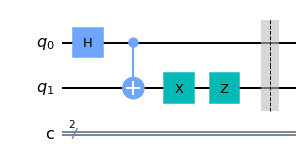

In [ ]:
from qiskit import QuantumCircuit, Aer,execute
import qiskit.quantum_info as qi
import numpy as np
qc = QuantumCircuit(2,2) # Ponemos 2 qubits y 2 bits
qc.h(0) 
qc.cx(0,1) 
qc.x(1)
qc.z(1)
qc.barrier()
stv = qi.Statevector.from_instruction(qc)
qc.draw("mpl")


In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

A continuación corremos los 9 experimentos

In [ ]:
backend = Aer.get_backend('qasm_simulator')

N_corr = 0
N_anticorr = 0
qc3 = QuantumCircuit(2, 2)
qc3.measure(0,0)
qc3.measure(1,1)
print("                       Experimento A1B1")
qc11=qc
print(qc11)
qc11=qc.compose(qc3)
job11 = execute(qc11,backend, shots=1000)
result = job11.result()
print("Resultados :",result.get_counts(qc11))
if job11.result().get_counts().get('11') is not None:
  N_corr += job11.result().get_counts()['11']
if job11.result().get_counts().get('00') is not None:
  N_corr += job11.result().get_counts()['00']
N_anticorr += job11.result().get_counts()['01']+job11.result().get_counts()['10']

print()
print("                       Experimento A1B2")
qc12 = QuantumCircuit(2, 2)
qc12.rz(0,1)
qc12.ry(-2*np.pi/3,1)
qc12.barrier()
qc12=qc.compose(qc12)
qc12=qc12.compose(qc3)
print(qc12)
job12 = execute(qc12,backend, shots=1000)
result = job12.result()
print("Resultados :",result.get_counts(qc12))
N_corr += job12.result().get_counts()['11']+job12.result().get_counts()['00']
N_anticorr += job12.result().get_counts()['01']+job12.result().get_counts()['10']

print()
print("                       Experimento A1B3")
qc13 = QuantumCircuit(2, 2)
qc13.rz(-np.pi,1)
qc13.ry(-2*np.pi/3,1)
qc13.barrier()
qc13=qc.compose(qc13)
qc13=qc13.compose(qc3)
print(qc13)
job13 = execute(qc13,backend, shots=1000)
result = job13.result()
print("Resultados :",result.get_counts(qc13))
N_corr += job13.result().get_counts()['11']+job13.result().get_counts()['00']
N_anticorr += job13.result().get_counts()['01']+job13.result().get_counts()['10']

print()
print("                       Experimento A2B1")
qc21 = QuantumCircuit(2, 2)
qc21.rz(0,0)
qc21.ry(-2*np.pi/3,0)
qc21.barrier()
qc21=qc.compose(qc21)
qc21=qc21.compose(qc3)
print(qc21)
job21 = execute(qc21,backend, shots=1000)
result = job21.result()
print("Resultados :",result.get_counts(qc21))
N_corr += job21.result().get_counts()['11']+job21.result().get_counts()['00']
N_anticorr += job21.result().get_counts()['01']+job21.result().get_counts()['10']

print()
print("                       Experimento A2B2")
qc22 = QuantumCircuit(2, 2)
qc22.rz(0,0)
qc22.ry(-2*np.pi/3,0)
qc22.rz(0,1)
qc22.ry(-2*np.pi/3,1)
qc22.barrier()
qc22=qc.compose(qc22)
qc22=qc22.compose(qc3)
print(qc22)
job22 = execute(qc22,backend, shots=1000)
result = job22.result()
print("Resultados :",result.get_counts(qc22))
if job22.result().get_counts().get('11') is not None:
  N_corr += job22.result().get_counts()['11']
if job22.result().get_counts().get('00') is not None:
  N_corr += job22.result().get_counts()['00']
N_anticorr += job22.result().get_counts()['01']+job22.result().get_counts()['10']

print()
print("                       Experimento A2B3")
qc23 = QuantumCircuit(2, 2)
qc23.rz(0,0)
qc23.ry(-2*np.pi/3,0)
qc23.rz(-np.pi,1)
qc23.ry(-2*np.pi/3,1)
qc23.barrier()
qc23=qc.compose(qc23)
qc23=qc23.compose(qc3)
print(qc23)
job23 = execute(qc23,backend, shots=1000)
result = job23.result()
print("Resultados :",result.get_counts(qc23))
N_corr += job23.result().get_counts()['11']+job23.result().get_counts()['00']
N_anticorr += job23.result().get_counts()['01']+job23.result().get_counts()['10']

print()
print("                       Experimento A3B1")
qc31 = QuantumCircuit(2, 2)
qc31.rz(-np.pi,0)
qc31.ry(-2*np.pi/3,0)
qc31.barrier()
qc31=qc.compose(qc31)
qc31=qc31.compose(qc3)
print(qc31)
job31 = execute(qc31,backend, shots=1000)
result = job31.result()
print("Resultados :",result.get_counts(qc31))
N_corr += job31.result().get_counts()['11']+job31.result().get_counts()['00']
N_anticorr += job31.result().get_counts()['01']+job31.result().get_counts()['10']

print()
print("                       Experimento A3B2")
qc32 = QuantumCircuit(2, 2)
qc32.rz(-np.pi,0)
qc32.ry(-2*np.pi/3,0)
qc32.rz(0,1)
qc32.ry(-2*np.pi/3,1)
qc32.barrier()
qc32=qc.compose(qc32)
qc32=qc32.compose(qc3)
print(qc32)
job32 = execute(qc32,backend, shots=1000)
result = job31.result()
print("Resultados :",result.get_counts(qc32))
N_corr += job32.result().get_counts()['11']+job32.result().get_counts()['00']
N_anticorr += job32.result().get_counts()['01']+job32.result().get_counts()['10']

print()
print("                       Experimento A3B3")
qc33 = QuantumCircuit(2, 2)
qc33.rz(-np.pi,0)
qc33.ry(-2*np.pi/3,0)
qc33.rz(-np.pi,1)
qc33.ry(-2*np.pi/3,1)
qc33.barrier()
qc33=qc.compose(qc33)
qc33=qc33.compose(qc3)
print(qc33)
job33 = execute(qc33,backend, shots=1000)
result = job33.result()
print("Resultados :",result.get_counts(qc33))
if job33.result().get_counts().get('11') is not None:
  N_corr += job33.result().get_counts()['11']
if job33.result().get_counts().get('00') is not None:
  N_corr += job33.result().get_counts()['00']
N_anticorr += job33.result().get_counts()['01']+job33.result().get_counts()['10']
print("Total correlated:", N_corr, " Total anti-correlated:", N_anticorr)

                       Experimento A1B1
     ┌───┐                ░ 
q_0: ┤ H ├──■─────────────░─
     └───┘┌─┴─┐┌───┐┌───┐ ░ 
q_1: ─────┤ X ├┤ X ├┤ Z ├─░─
          └───┘└───┘└───┘ ░ 
c: 2/═══════════════════════
                            
Resultados : {'01': 499, '10': 501}

                       Experimento A1B2
     ┌───┐                ░                        ░ ┌─┐   
q_0: ┤ H ├──■─────────────░────────────────────────░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ ┌───────┐┌───────────┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├┤ X ├┤ Z ├─░─┤ Rz(0) ├┤ Ry(-2π/3) ├─░──╫─┤M├
          └───┘└───┘└───┘ ░ └───────┘└───────────┘ ░  ║ └╥┘
c: 2/═════════════════════════════════════════════════╩══╩═
                                                      0  1 
Resultados : {'01': 117, '10': 131, '00': 342, '11': 410}

                       Experimento A1B3
     ┌───┐                ░                         ░ ┌─┐   
q_0: ┤ H ├──■─────────────░─────────────────────────░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ ┌────────┐┌

## **6.4 Prueba de Bell en una Computadora Cuántica Simulada con Ruido**

We can add a noise model obtained from a real quantum computer from the IBM Quantum Experience, for example with
```
IBMQ.save_account('IBMQ-password', overwrite=True)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila')
```

In [ ]:
from qiskit import IBMQ, Aer
from qiskit_aer.noise import NoiseModel
IBMQ.save_account('your-IBMQ-password', overwrite=True)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila')
noise_model = NoiseModel.from_backend(backend)
print("----------Noise Model for",backend,"--------------\n",noise_model)

or we can get the least busy quantum computer with the following code:

In [ ]:
from qiskit import QuantumCircuit, Aer,execute
from qiskit.visualization import plot_histogram
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
print("----------Noise Model for",backend,"--------------\n",noise_model)

ibmqfactory.load_account:WARNING:2023-02-21 15:47:59,442: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_belem
----------Noise Model for ibmq_belem --------------
 NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['cx', 'x', 'id', 'reset', 'measure', 'sx']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (4, 3)), ('cx', (3, 4)), ('cx', (2, 3)), ('cx', (3, 2)), ('cx', (1, 2)), ('cx', (2, 1)), ('cx', (0, 1)), ('cx', (1, 0)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


The following code adds the noise model taken from the chosen backend to the
simulation

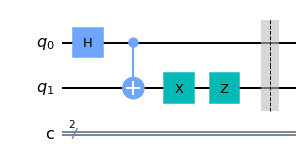

In [ ]:
from qiskit import QuantumCircuit, Aer
import qiskit.quantum_info as qi
import numpy as np
qc = QuantumCircuit(2,2) # Ponemos 2 qubits y 2 bits
qc.h(0) 
qc.cx(0,1) 
qc.x(1)
qc.z(1)
qc.barrier()
stv = qi.Statevector.from_instruction(qc)
qc.draw("mpl")


In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

In [ ]:
backend = AerSimulator.from_backend(backend)
shots = 1000
N_corr = 0
N_anticorr = 0
qc3 = QuantumCircuit(2, 2)
qc3.measure(0,0)
qc3.measure(1,1)
print("                       Experiment A1B1")
qc11=qc
qc11=qc.compose(qc3)
print(qc11)
tqc11 = transpile(qc11, backend, optimization_level=3)
job11 = backend.run(tqc11,shots =shots)
print("Results :",job11.result().get_counts())
if job11.result().get_counts().get('11') is not None:
  N_corr += job11.result().get_counts()['11']
if job11.result().get_counts().get('00') is not None:
  N_corr += job11.result().get_counts()['00']
N_anticorr += job11.result().get_counts()['01']+job11.result().get_counts()['10']

print("\n                       Experiment A1B2")
qc12 = QuantumCircuit(2, 2)
qc12.rz(0,1)
qc12.ry(-2*np.pi/3,1)
qc12.barrier()
qc12=qc.compose(qc12)
qc12=qc12.compose(qc3)
print(qc12)
tqc12 = transpile(qc12, backend, optimization_level=3)
job12 = backend.run(tqc12,shots =shots)
print("Results :",job12.result().get_counts())
N_corr += job12.result().get_counts()['11']+job12.result().get_counts()['00']
N_anticorr += job12.result().get_counts()['01']+job12.result().get_counts()['10']

print("\n                       Experiment A1B3")
qc13 = QuantumCircuit(2, 2)
qc13.rz(-np.pi,1)
qc13.ry(-2*np.pi/3,1)
qc13.barrier()
qc13=qc.compose(qc13)
qc13=qc13.compose(qc3)
print(qc13)
tqc13 = transpile(qc13, backend, optimization_level=3)
job13 = backend.run(tqc13,shots =shots)
print("Results :",job13.result().get_counts())
N_corr += job13.result().get_counts()['11']+job13.result().get_counts()['00']
N_anticorr += job13.result().get_counts()['01']+job13.result().get_counts()['10']

print("\n                       Experiment A2B1")
qc21 = QuantumCircuit(2, 2)
qc21.rz(0,0)
qc21.ry(-2*np.pi/3,0)
qc21.barrier()
qc21=qc.compose(qc21)
qc21=qc21.compose(qc3)
print(qc21)
tqc21 = transpile(qc21, backend, optimization_level=3)
job21 = backend.run(tqc21,shots =shots)
print("Results :",job21.result().get_counts())
N_corr += job21.result().get_counts()['11']+job21.result().get_counts()['00']
N_anticorr += job21.result().get_counts()['01']+job21.result().get_counts()['10']

print("\n                        Experiment A2B2")
qc22 = QuantumCircuit(2, 2)
qc22.rz(0,0)
qc22.ry(-2*np.pi/3,0)
qc22.rz(0,1)
qc22.ry(-2*np.pi/3,1)
qc22.barrier()
qc22=qc.compose(qc22)
qc22=qc22.compose(qc3)
print(qc22)
tqc22 = transpile(qc22, backend, optimization_level=3)
job22 = backend.run(tqc22,shots =shots)
print("Results :",job22.result().get_counts())
if job22.result().get_counts().get('11') is not None:
  N_corr += job22.result().get_counts()['11']
if job22.result().get_counts().get('00') is not None:
  N_corr += job22.result().get_counts()['00']
N_anticorr += job22.result().get_counts()['01']+job22.result().get_counts()['10']

print("\n                        Experiment A2B3")
qc23 = QuantumCircuit(2, 2)
qc23.rz(0,0)
qc23.ry(-2*np.pi/3,0)
qc23.rz(-np.pi,1)
qc23.ry(-2*np.pi/3,1)
qc23.barrier()
qc23=qc.compose(qc23)
qc23=qc23.compose(qc3)
print(qc23)
tqc23 = transpile(qc23, backend, optimization_level=3)
job23 = backend.run(tqc23,shots =shots)
print("Results :",job23.result().get_counts())
N_corr += job23.result().get_counts()['11']+job23.result().get_counts()['00']
N_anticorr += job23.result().get_counts()['01']+job23.result().get_counts()['10']

print("\n                        Experiment A3B1")
qc31 = QuantumCircuit(2, 2)
qc31.rz(-np.pi,0)
qc31.ry(-2*np.pi/3,0)
qc31.barrier()
qc31=qc.compose(qc31)
qc31=qc31.compose(qc3)
print(qc31)
tqc31 = transpile(qc31, backend, optimization_level=3)
job31 = backend.run(tqc31,shots =shots)
print("Results :",job31.result().get_counts())
N_corr += job31.result().get_counts()['11']+job31.result().get_counts()['00']
N_anticorr += job31.result().get_counts()['01']+job31.result().get_counts()['10']

print("\n                        Experiment A3B2")
qc32 = QuantumCircuit(2, 2)
qc32.rz(-np.pi,0)
qc32.ry(-2*np.pi/3,0)
qc32.rz(0,1)
qc32.ry(-2*np.pi/3,1)
qc32.barrier()
qc32=qc.compose(qc32)
qc32=qc32.compose(qc3)
print(qc32)
tqc32 = transpile(qc32, backend, optimization_level=3)
job32 = backend.run(tqc32,shots =shots)
print("Results :",job32.result().get_counts(qc32))
N_corr += job32.result().get_counts()['11']+job32.result().get_counts()['00']
N_anticorr += job32.result().get_counts()['01']+job32.result().get_counts()['10']

print("\n                        Experiment A3B3")
qc33 = QuantumCircuit(2, 2)
qc33.rz(-np.pi,0)
qc33.ry(-2*np.pi/3,0)
qc33.rz(-np.pi,1)
qc33.ry(-2*np.pi/3,1)
qc33.barrier()
qc33=qc.compose(qc33)
qc33=qc33.compose(qc3)
print(qc33)
tqc33 = transpile(qc33, backend, optimization_level=3)
job33 = backend.run(tqc33,shots =shots)
print("Results :",job33.result().get_counts(qc33))
if job33.result().get_counts().get('11') is not None:
  N_corr += job33.result().get_counts()['11']
if job33.result().get_counts().get('00') is not None:
  N_corr += job33.result().get_counts()['00']
N_anticorr += job33.result().get_counts()['01']+job33.result().get_counts()['10']
print("\nOut of a total of",9*shots,"measurements, we obtained")
print("Total correlated measurements:", N_corr)
print("Total anti-correlated measurements:", N_anticorr," corresponding to ",np.round(100*N_anticorr/(9*shots),2),"%")


                       Experiment A1B1
     ┌───┐                ░ ┌─┐   
q_0: ┤ H ├──■─────────────░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├┤ X ├┤ Z ├─░──╫─┤M├
          └───┘└───┘└───┘ ░  ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1 
Results : {'11': 13, '01': 482, '00': 35, '10': 470}

                       Experiment A1B2
     ┌───┐                ░                        ░ ┌─┐   
q_0: ┤ H ├──■─────────────░────────────────────────░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ ┌───────┐┌───────────┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├┤ X ├┤ Z ├─░─┤ Rz(0) ├┤ Ry(-2π/3) ├─░──╫─┤M├
          └───┘└───┘└───┘ ░ └───────┘└───────────┘ ░  ║ └╥┘
c: 2/═════════════════════════════════════════════════╩══╩═
                                                      0  1 
Results : {'01': 129, '10': 104, '00': 396, '11': 371}

                       Experiment A1B3
     ┌───┐                ░                         ░ ┌─┐   
q_0: ┤ H ├──■─────────────░────────────────────

## **6.5 Prueba de Bell en una Computadora Cuántica Real**

We can select a specific real quantum computer from the IBM Quantum Experience, for example with
```
IBMQ.save_account('IBMQ-password', overwrite=True)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila')
```


In [ ]:
from qiskit import IBMQ, Aer
from qiskit_aer.noise import NoiseModel
IBMQ.save_account('your-IBMQ-password', overwrite=True)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila')
noise_model = NoiseModel.from_backend(backend)
print("----------Noise Model for",backend,"--------------\n",noise_model)

configrc.store_credentials:WARNING:2023-02-21 16:13:36,477: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-02-21 16:13:36,681: Credentials are already in use. The existing account in the session will be replaced.


----------Noise Model for ibmq_manila --------------
 NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['cx', 'x', 'id', 'reset', 'measure', 'sx']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (4, 3)), ('cx', (3, 4)), ('cx', (2, 3)), ('cx', (3, 2)), ('cx', (1, 2)), ('cx', (2, 1)), ('cx', (0, 1)), ('cx', (1, 0)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


or we can get the least busy quantum computer with the following code:

In [ ]:
from qiskit import QuantumCircuit, Aer,execute
from qiskit.visualization import plot_histogram
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
print("----------Noise Model for",backend,"--------------\n",noise_model)

ibmqfactory.load_account:WARNING:2023-02-21 16:13:45,085: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_belem
----------Noise Model for ibmq_belem --------------
 NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['cx', 'x', 'id', 'reset', 'measure', 'sx']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (4, 3)), ('cx', (3, 4)), ('cx', (2, 3)), ('cx', (3, 2)), ('cx', (1, 2)), ('cx', (2, 1)), ('cx', (0, 1)), ('cx', (1, 0)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


The base circuit is

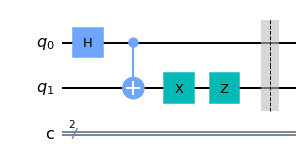

In [ ]:
from qiskit import QuantumCircuit, Aer
import qiskit.quantum_info as qi
import numpy as np
qc = QuantumCircuit(2,2) # Ponemos 2 qubits y 2 bits
qc.h(0) 
qc.cx(0,1) 
qc.x(1)
qc.z(1)
qc.barrier()
stv = qi.Statevector.from_instruction(qc)
qc.draw("mpl")

In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

We run the first 5 experiments with

In [ ]:
shots = 1000
N_corr = 0
N_anticorr = 0
qc3 = QuantumCircuit(2, 2)
qc3.measure(0,0)
qc3.measure(1,1)
print("                       Experiment A1B1")
qc11=qc
qc11=qc.compose(qc3)
print(qc11)
tqc11 = transpile(qc11, backend, optimization_level=3)
job11 = backend.run(tqc11,shots =shots)
print("\n                       Experiment A1B2")
qc12 = QuantumCircuit(2, 2)
qc12.rz(0,1)
qc12.ry(-2*np.pi/3,1)
qc12.barrier()
qc12=qc.compose(qc12)
qc12=qc12.compose(qc3)
print(qc12)
tqc12 = transpile(qc12, backend, optimization_level=3)
job12 = backend.run(tqc12,shots =shots)
print("\n                       Experiment A1B3")
qc13 = QuantumCircuit(2, 2)
qc13.rz(-np.pi,1)
qc13.ry(-2*np.pi/3,1)
qc13.barrier()
qc13=qc.compose(qc13)
qc13=qc13.compose(qc3)
print(qc13)
tqc13 = transpile(qc13, backend, optimization_level=3)
job13 = backend.run(tqc13,shots =shots)
print("\n                       Experiment A2B1")
qc21 = QuantumCircuit(2, 2)
qc21.rz(0,0)
qc21.ry(-2*np.pi/3,0)
qc21.barrier()
qc21=qc.compose(qc21)
qc21=qc21.compose(qc3)
print(qc21)
tqc21 = transpile(qc21, backend, optimization_level=3)
job21 = backend.run(tqc21,shots =shots)
print("\n                        Experiment A2B2")
qc22 = QuantumCircuit(2, 2)
qc22.rz(0,0)
qc22.ry(-2*np.pi/3,0)
qc22.rz(0,1)
qc22.ry(-2*np.pi/3,1)
qc22.barrier()
qc22=qc.compose(qc22)
qc22=qc22.compose(qc3)
print(qc22)
tqc22 = transpile(qc22, backend, optimization_level=3)
job22 = backend.run(tqc22,shots =shots)

We can monitor them with

In [ ]:
from qiskit.providers.jobstatus import JobStatus
print(job11.status(),job11.queue_position())
print(job12.status(),job12.queue_position())
print(job13.status(),job13.queue_position())
print(job21.status(),job21.queue_position())
print(job22.status(),job22.queue_position())


Once the first 5 jobs have run we send the last 4 jobs with

In [ ]:
print("\n                        Experiment A2B3")
qc23 = QuantumCircuit(2, 2)
qc23.rz(0,0)
qc23.ry(-2*np.pi/3,0)
qc23.rz(-np.pi,1)
qc23.ry(-2*np.pi/3,1)
qc23.barrier()
qc23=qc.compose(qc23)
qc23=qc23.compose(qc3)
print(qc23)
tqc23 = transpile(qc23, backend, optimization_level=3)
job23 = backend.run(tqc23,shots =shots)
print("\n                        Experiment A3B1")
qc31 = QuantumCircuit(2, 2)
qc31.rz(-np.pi,0)
qc31.ry(-2*np.pi/3,0)
qc31.barrier()
qc31=qc.compose(qc31)
qc31=qc31.compose(qc3)
print(qc31)
tqc31 = transpile(qc31, backend, optimization_level=3)
job31 = backend.run(tqc31,shots =shots)
print("\n                        Experiment A3B2")
qc32 = QuantumCircuit(2, 2)
qc32.rz(-np.pi,0)
qc32.ry(-2*np.pi/3,0)
qc32.rz(0,1)
qc32.ry(-2*np.pi/3,1)
qc32.barrier()
qc32=qc.compose(qc32)
qc32=qc32.compose(qc3)
print(qc32)
tqc32 = transpile(qc32, backend, optimization_level=3)
job32 = backend.run(tqc32,shots =shots)
print("\n                        Experiment A3B3")
qc33 = QuantumCircuit(2, 2)
qc33.rz(-np.pi,0)
qc33.ry(-2*np.pi/3,0)
qc33.rz(-np.pi,1)
qc33.ry(-2*np.pi/3,1)
qc33.barrier()
qc33=qc.compose(qc33)
qc33=qc33.compose(qc3)
print(qc33)
tqc33 = transpile(qc33, backend, optimization_level=3)
job33 = backend.run(tqc33,shots =shots)

and monitor their execution with

In [ ]:
print(job23.status(),job23.queue_position())
print(job31.status(),job31.queue_position())
print(job32.status(),job32.queue_position())
print(job33.status(),job33.queue_position())

Once the 9 jobs finish we get their results with

In [ ]:
N_corr = 0
N_anticorr = 0
print("                       Experiment A1B1")
print("Results :",job11.result().get_counts())
if job11.result().get_counts().get('11') is not None:
  N_corr += job11.result().get_counts()['11']
if job11.result().get_counts().get('00') is not None:
  N_corr += job11.result().get_counts()['00']
N_anticorr += job11.result().get_counts()['01']+job11.result().get_counts()['10']
print("                       Experiment A1B2")
print("Results :",job12.result().get_counts())
N_corr += job12.result().get_counts()['11']
N_corr += job12.result().get_counts()['00']
N_anticorr += job12.result().get_counts()['01']+job12.result().get_counts()['10']
print("                       Experiment A1B3")
print("Results :",job13.result().get_counts())
N_corr += job13.result().get_counts()['11']
N_corr += job13.result().get_counts()['00']
N_anticorr += job13.result().get_counts()['01']+job13.result().get_counts()['10']
print("                       Experiment A2B1")
print("Results :",job21.result().get_counts())
N_corr += job21.result().get_counts()['11']
N_corr += job21.result().get_counts()['00']
N_anticorr += job21.result().get_counts()['01']+job21.result().get_counts()['10']
print("                       Experiment A2B2")
print("Results :",job22.result().get_counts())
if job22.result().get_counts().get('11') is not None:
  N_corr += job22.result().get_counts()['11']
if job22.result().get_counts().get('00') is not None:
  N_corr += job22.result().get_counts()['00']
N_anticorr += job22.result().get_counts()['01']+job22.result().get_counts()['10']
print("                       Experiment A2B3")
print("Results :",job23.result().get_counts())
N_corr += job23.result().get_counts()['11']
N_corr += job23.result().get_counts()['00']
N_anticorr += job23.result().get_counts()['01']+job23.result().get_counts()['10']
print("                       Experiment A3B1")
print("Results :",job31.result().get_counts())
N_corr += job31.result().get_counts()['11']
N_corr += job31.result().get_counts()['00']
N_anticorr += job31.result().get_counts()['01']+job31.result().get_counts()['10']
print("                       Experiment A3B2")
print("Results :",job32.result().get_counts())
N_corr += job32.result().get_counts()['11']
N_corr += job32.result().get_counts()['00']
N_anticorr += job32.result().get_counts()['01']+job32.result().get_counts()['10']
print("                       Experiment A3B3")
print("Results :",job33.result().get_counts())
if job33.result().get_counts().get('11') is not None:
  N_corr += job33.result().get_counts()['11']
if job33.result().get_counts().get('00') is not None:
  N_corr += job33.result().get_counts()['00']
N_anticorr += job33.result().get_counts()['01']+job33.result().get_counts()['10']

print("\nOut of a total of",9*shots,"measurements, we obtained")
print("Total correlated measurements:", N_corr)
print("Total anti-correlated measurements:", N_anticorr," corresponding to ",np.round(100*N_anticorr/(9*shots),2),"%")

<hr style="border:2px solid gray"> </hr>

# $\color{blue}{\text{Segundo Taller}}$
<hr style="border:2px solid gray"> </hr>

# **7. Repaso del Primer Taller**

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend, shots=1000)
result = job.result()
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))

**Estados cuánticos para 1 qubit**. Representación como kets o vectores columna 

Z basis
$$
|0\rangle = \begin{pmatrix} 1 \\\\ 0 \end{pmatrix} \, \, \, \, |1\rangle =\begin{pmatrix} 0 \\\\ 1 \end{pmatrix}.
$$


X basis
$$
|\pm\rangle = \frac{|0\rangle \pm|1\rangle}{\sqrt{2}}=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\\\ \pm1 \end{pmatrix}.
$$


Y basis

$$
|\circlearrowright\rangle = \frac{ | 0 \rangle + i | 1 \rangle}{\sqrt{2}} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\\\ i \end{pmatrix}, ~~~~ |\circlearrowleft\rangle = \frac{ | 0 \rangle -i | 1 \rangle}{\sqrt{2}} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\\\ -i \end{pmatrix}.
$$


<div align="center"> $|\psi\rangle= \alpha|0\rangle + \beta|1\rangle$ </div>

La probabilidad de medir $|0\rangle$ es $\alpha \alpha^*$ y la probabilidad de medir $|1\rangle$ es $\beta \beta^*$

En general para un qubit

$$
|\psi\rangle = \cos{\frac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}|1\rangle
$$  
con $0\leq \phi < 2\pi$, y $0\leq \theta \leq \pi$.

**Los operadores cuánticos son unitarios**

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

$$
U U^\dagger = U^\dagger U = 1.
$$

A $U^\dagger$ se le llama **transpuesto conjugado** y corresponde al inverso de $U$

Por ejemplo un operador unitario que transforma $\left|0\right\rangle$ en  $\left|\psi\right\rangle$ es

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

con $a$ y $b$ números complejos de modo que  $U^\dagger U = I$ para todos los ángulos$0\leq\theta\leq\pi$ y $0\leq \phi<2\pi$. Con $0\leq \lambda<2\pi$ 

$$
U(\theta, \phi, \lambda) =
    \begin{pmatrix}
        \cos\left(\frac{\theta}{2}\right)          & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\
        e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
    \end{pmatrix}
$$


**Los operadores unitarios son reversibles y no cambian la norma del estado cuántico**. 

La medición no es una operación unitaria y tampoco es reversible. 

**Uso de Qiskit**

También vimos cómo usar Qiskit

Lo instalamos con el siguiente comando en una terminal

*pip install qiskit*

o en una celda de jupyter con

*!pip install qiskit*

Para ver las **versiones de los componentes** corremos el código


In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

**Ejemplo de Circuito y de Inicialización con Qiskit**

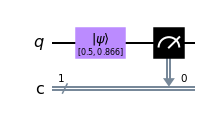

In [ ]:
from qiskit import QuantumCircuit, Aer,execute
import numpy as np
import qiskit.quantum_info as qi
qc = QuantumCircuit(1,1) # Ponemos 1 qubit y 1 bit
psi = [np.cos(2*np.pi/3/2),np.sin(2*np.pi/3/2)]
qc.initialize(psi, 0)
stv = qi.Statevector.from_instruction(qc)
stv.draw('latex', prefix="|\\psi\\rangle =")
qc.measure(0,0)
qc.draw(output='mpl')

**Visualización mediante la Esfera de Bloch**

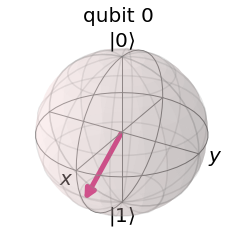

In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(psi)

**Ejecución del Circuito en Qiskit**

{'0': 250, '1': 750}


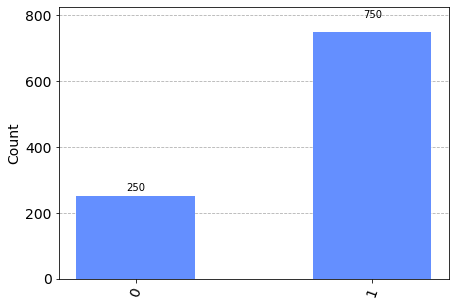

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
n_shots = 1000
job = execute(qc,backend, shots=n_shots, memory=True)
result = job.result()
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))

Para obtener los resultados detallados de cada medición agregamos

"memory=True" 

a la línea 4 del código anterior y usamos el código siguiente

In [ ]:
Data =result.get_memory()
np.array(list(map(int, Data)))
print(np.array(list(map(int, Data))))
print("Suma de 1s =",sum(np.array(list(map(int, Data)))),"Suma de 0s =",n_shots-sum(np.array(list(map(int, Data)))))

**Operadores Hermíticos**

Las operadores hermíticos cumplen con que son auto-adjuntos. Sus valores propios son reales y sus vectores propios son ortogonales. Representas cantidades medibles.

$$
H = H^\dagger.
$$


**Operadores o matrices de Pauli**
$$
X= \begin{pmatrix} 0&1 \\\\ 1&0 \end{pmatrix} \hspace{2cm}
Y= \begin{pmatrix} 0&-i \\\\ i&0 \end{pmatrix}\hspace{2cm}
Z= \begin{pmatrix} 1&0 \\\\ 0&-1 \end{pmatrix}
$$


**Bras como vectores fila, Kets como vectores columna y Matrices como productos tensoriales de Bras y Kets**

$$
|0\rangle\langle0|= \begin{pmatrix} 1 \\\\ 0 \end{pmatrix} \begin{pmatrix} 1 & 0 \end{pmatrix} = \begin{pmatrix} 1&0 \\\\ 0&0 \end{pmatrix},\\\\
|0\rangle\langle1| = \begin{pmatrix} 1 \\\\ 0 \end{pmatrix} \begin{pmatrix} 0 & 1 \end{pmatrix} = \begin{pmatrix} 0&1 \\\\ 0&0 \end{pmatrix},\\\\
|1\rangle\langle0| = \begin{pmatrix} 0 \\\\ 1 \end{pmatrix} \begin{pmatrix} 1 & 0 \end{pmatrix} = \begin{pmatrix} 0&0 \\\\ 1&0 \end{pmatrix},\\\\
|1\rangle\langle1| = \begin{pmatrix} 0 \\\\ 1 \end{pmatrix} \begin{pmatrix} 0 & 1 \end{pmatrix} = \begin{pmatrix} 0&0 \\\\ 0&1 \end{pmatrix}.\\\\
$$

para la compuerta X de Pauli

$$ X =\ket{0}\bra{1} + \ket{1}\bra{0}$$

$$ X \ket{0} = \ket{1}$$
$$ X \ket{1} = \ket{0}$$

para la compuerta Y de Pauli
$$ Y =-i\ket{0}\bra{1} + i\ket{1}\bra{0}$$

$$ Y \ket{0}= i\ket{1}$$
$$ Y \ket{1}= -i\ket{0}$$

para la compuerta Z de Pauli
$$ Z =\ket{0}\bra{0} - \ket{1}\bra{1}$$

$$ Z \ket{0}= \ket{0} $$
$$ Z \ket{1}= -\ket{1} $$

para la compuerta H de Hadamard
$$ H =\frac{\ket{0}+\ket{1}}{\sqrt{2}} \bra{0}+ \frac{\ket{0}-\ket{1}}{\sqrt{2}} \bra{1}$$

$$ H \ket{0} =\frac{\ket{0}+\ket{1}}{\sqrt{2}}$$
$$ H \ket{1} =\frac{\ket{0}-\ket{1}}{\sqrt{2}}$$


**Estados con 2 qubits y compuertas**

El espacio de una computadora cuántica crece exponencialmente con el número de qubits, para $n$ qubits el espacio vectorial complejo tiene dimensión $d=2^n$. Se usa el **producto tensorial** para describir estados y operadores con multi-qubits. 

Para un sistema de 2 qubits y 2 operadores $A$ y $B$ que actúan en su respectivo qubit, el producto tensorial de estados y operadores es

$$\begin{equation}\begin{split}
	\left|{00}\right\rangle &= \begin{pmatrix} 
		1 \begin{pmatrix} 
			1  \\
			0
		\end{pmatrix} \\
		0 \begin{pmatrix} 
			1  \\
			0 
		\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix}~~~\left|{01}\right\rangle = \begin{pmatrix} 
	1 \begin{pmatrix} 
	0 \\
	1
	\end{pmatrix} \\
	0 \begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\end{split}
\end{equation}$$
    
$$\begin{equation}\begin{split}\left|{10}\right\rangle = \begin{pmatrix} 
	0\begin{pmatrix} 
	1  \\
	0
	\end{pmatrix} \\
	1\begin{pmatrix} 
	1 \\
	0 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}~~~ 	\left|{11}\right\rangle = \begin{pmatrix} 
	0 \begin{pmatrix} 
	0  \\
	1
	\end{pmatrix} \\
	1\begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}\end{split}
\end{equation}.$$



$$\begin{equation}
	A\otimes B = 
	\begin{pmatrix} 
		A_{00} \begin{pmatrix} 
			B_{00} & B_{01} \\
			B_{10} & B_{11}
		\end{pmatrix} & A_{01} 	\begin{pmatrix} 
				B_{00} & B_{01} \\
				B_{10} & B_{11}
			\end{pmatrix} \\
		A_{10} 	\begin{pmatrix} 
					B_{00} & B_{01} \\
					B_{10} & B_{11}
				\end{pmatrix} & A_{11} 	\begin{pmatrix} 
							B_{00} & B_{01} \\
							B_{10} & B_{11}
						\end{pmatrix}
	\end{pmatrix},						
\end{equation}$$





Donde $\left|0\right\rangle \otimes \left|0\right\rangle$ se abrevia como $\left|00\right\rangle$. 

Por ejemplo

$$
Z \otimes X=  \begin{bmatrix} 1&0 \\ 0&-1 \end{bmatrix} \otimes \begin{bmatrix} 0&1 \\ 1&0 \end{bmatrix} = \begin{bmatrix} 0&1&0&0 \\ 1&0&0&0\\0&0&0&-1\\0&0&-1&0 \end{bmatrix}.
$$


**Compuertas de Pauli Controladas**

para la compuerta CNOT aplicada a 2 quibits, el primer bit (el que está a la derecha), se llama de control y el segundo se llama objetivo. Si el qubit de control es 1 el qubit objetivo se niega.
$$ CNOT \ket{00}= \ket{00}$$
$$ CNOT \ket{01}= \ket{11}$$
$$ CNOT \ket{10}= \ket{10}$$
$$ CNOT \ket{11}= \ket{01}$$


**Compuerta SWAP**

SWAP intercambia los 2 qubits

$$\left|00\right\rangle \rightarrow \left|00\right\rangle~,~\left|01\right\rangle \rightarrow \left|10\right\rangle~,~\left|10\right\rangle \rightarrow \left|01\right\rangle~,~\left|11\right\rangle \rightarrow \left|11\right\rangle,$$

o en forma matricial

$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

**Estados de 3 qubits**


La base computacional es

$$\left|000\right\rangle, \left|001\right\rangle, \left|010\right\rangle, \left|011\right\rangle, \left|100\right\rangle, \left|101\right\rangle, \left|110\right\rangle, \left|111\right\rangle,$$


$$\left|abc\right\rangle : \underset{\text{qubit 2}}{\left|a\right\rangle}\otimes \underset{\text{qubit 1}}{\left|b\right\rangle}\otimes \underset{\text{qubit 0}}{\left|c\right\rangle}.$$

Para simplificar la notación en algoritmos es común usar la notación

$$\left|0\right\rangle, \left|1\right\rangle, \left|2\right\rangle, \left|3\right\rangle, \left|4\right\rangle, \left|5\right\rangle, \left|6\right\rangle, \left|7\right\rangle,$$


**Entrelazamiento de 2 Qubits. Estados de Bell**
$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|0\rangle \otimes |0\rangle + |1\rangle \otimes |1\rangle) \\
|\Phi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle \otimes |0\rangle - |1\rangle \otimes |1\rangle) \\
|\Psi^+\rangle = \frac{1}{\sqrt{2}} (|0\rangle \otimes |1\rangle + |1\rangle \otimes |0\rangle) \\
|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle \otimes |1\rangle - |1\rangle \otimes |0\rangle)
$$

o bien

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|0\rangle |0\rangle + |1\rangle  |1\rangle) \\
|\Phi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle  |0\rangle - |1\rangle  |1\rangle) \\
|\Psi^+\rangle = \frac{1}{\sqrt{2}} (|0\rangle |1\rangle + |1\rangle  |0\rangle) \\
|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle  |1\rangle - |1\rangle  |0\rangle)
$$

Normalmente se usa la siguiente notación simplificada:

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

$$  \ket{\Phi^+} =\frac{\ket{00}+\ket{11}}{\sqrt{2}}$$

$$  \ket{\Phi^-} =\frac{\ket{00}-\ket{11}}{\sqrt{2}}$$

$$  \ket{\Psi^+} =\frac{\ket{01}+\ket{10}}{\sqrt{2}}$$

$$  \ket{\Psi^-} =\frac{\ket{01}-\ket{10}}{\sqrt{2}}$$

Por ejemplo para **crear el primer estado de Bell** se usa el circuito siguiente:

In [ ]:
from qiskit import QuantumCircuit, Aer,execute
import qiskit.quantum_info as qi
qc = QuantumCircuit(2,2) # Ponemos 2 qubits y 2 bits
# Aplicamos algunas compuertas
qc.h(0) # Hadamard gate 
qc.cx(0,1) # CNOT gate
stv = qi.Statevector.from_instruction(qc)
for qubit in range(2):
  qc.measure(qubit,qubit)
qc.draw("mpl")

Las compuertas cuánticas aplicadas se expresan matemáticamente del modo siguiente:

$$ 
\begin{align*} (CNOT  )(I \otimes H  ) |00\rangle =(CNOT  )\ket{0}\otimes\frac{\ket{0}+\ket{1}}{\sqrt{2}} = \frac{1}{\sqrt{2}}(CNOT)( |00\rangle+|01\rangle) = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)
\end{align*}
$$


**Entrelazamiento de 3 Qubits. Estados GHZ**

Para 3 qubits los estados equivalentes a los de Bell de máximo entrelazamiento se llaman estados de Greenberger–Horne–Zeilinger.

Tienen propiedades muy interesantes.

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

$$  \ket{GHZ} =\frac{\ket{000}+\ket{111}}{\sqrt{2}}$$

que se obtiene mediante el siguiente circuito:

In [ ]:
from qiskit import QuantumCircuit, Aer,execute
import qiskit.quantum_info as qi
qc = QuantumCircuit(3,3) # Ponemos 3 qubits y 3 bits
# Aplicamos algunas compuertas
qc.h(0) # Hadamard gate 
qc.cx(0,1) # CNOT gate
qc.cx(1,2) # CNOT gate
stv = qi.Statevector.from_instruction(qc)
for qubit in range(3):
  qc.measure(qubit,qubit)
qc.draw("mpl")

Podemos verificar que en efecto se obtiene el estado GHZ si hacemos las operaciones a mano:

$$ 
\begin{align*} (CNOT \otimes I)(I \otimes CNOT)(I \otimes I \otimes H ) |000\rangle =\frac{1}{\sqrt{2}} (CNOT \otimes I)(I \otimes CNOT)(\ket{000}+ \ket{001}) = \frac{1}{\sqrt{2}}(CNOT \otimes I)(\ket{000}+ \ket{011}) = \frac{1}{\sqrt{2}}(\ket{000}+ \ket{111})
\end{align*}
$$


Podemos usar Qiskit para **inicializar un estado arbitrario** y para obtener **valores de expectación de operadores**

In [ ]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp,Zero, One, Z, X,Y,I
import numpy as np
psi = 1 / np.sqrt(2) * ((One ^ One^ One) + (Zero ^ Zero^ Zero))
op =  X^Y^Y +X^X^X
from IPython.display import display, Latex,Math
display(Math('|\psi> = \\frac{1}{\sqrt{2}}(|0>|0>|0>+|1>|1>|1>)'))
display(Latex(f'$<\psi|Op|\psi>$'))
print("=",np.round(psi.adjoint().compose(op).compose(psi).eval().real,1))


<IPython.core.display.Math object>

<IPython.core.display.Latex object>

= 0.0


Para medir la proyección del operador de espín en una dirección arbitraria

$$\hat{n} = \hat{i} sin\theta cos\phi  + \hat{j} sin\theta sin\phi + \hat{k} cos \theta$$

de la esfera de Bloch usamos 

$$\hat{\sigma} \cdot\hat{n}$$

con 

$$\hat{\sigma} = \hat{i}X + \hat{j}Y+\hat{k}Z$$

Por ejemplo el valor esperado del operador 

$$\hat{\sigma} \cdot\hat{n}$$ 

para el estado 

$$
|\psi\rangle = \cos{\frac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}|1\rangle
$$  
con $0\leq \phi < 2\pi$, y $0\leq \theta \leq \pi$.

es 
$$\langle \psi |\hat{\sigma} \cdot\hat{n}|\psi\rangle = \langle \psi |n_xX+n_yY+n_zZ|\psi\rangle$$ 

1 y -1 para $\hat{n} =\hat{i}$ y $\hat{n} =-\hat{i}$, respectivamente, como se puede ver con el código siguiente


In [ ]:
import numpy as np
from qiskit.opflow import Z, X,Y,I, Zero, One

#operator = (X+X)** +(Y+Y)**2 +(Z+Z)**2

operator = X 
psi = 1 / np.sqrt(2) * ((Zero + One))

expectation_value = (~psi @ operator @ psi).eval()
print(expectation_value.real)  

psi = 1 / np.sqrt(2) * ((Zero - One))


expectation_value = (psi.adjoint() @ operator @ psi).eval()
print(expectation_value.real)  

# Para más detalles ver https://arxiv.org/pdf/2206.14584.pdf

0.9999999999999998
-0.9999999999999998


En caso de que tengamos 2 qubits el valor esperado de los operadores 

$$\langle \psi |\hat{\sigma}_1 \cdot\hat{n}_1\otimes \hat{\sigma}_2 \cdot\hat{n}_2|\psi\rangle $$ se calcula de modo similar.

Por ejemplo para $$\hat{n}_1 = \hat{i} sin\theta cos\phi  + \hat{j} sin\theta sin\phi + \hat{k} cos \theta$$ 

con $\theta_1 = \frac{2\pi}{3}$, $\phi_1 = 0$ y $$\hat{n}_2 =  \hat{k} $$

y con $|\psi\rangle $ igual al estado singlete de Bell se tiene

In [ ]:
import numpy as np
from qiskit.opflow import Z, X,Y,I, Zero, One
operator = np.sin(2*np.pi/3)*X^Z+np.cos(2*np.pi/3)*Z^Z
psi = 1 / np.sqrt(2) * ((Zero ^ One) - (One ^ Zero)) 
expectation_value = (psi.adjoint() @ operator @ psi).eval()
print(expectation_value.real)    
# Para más detalles ver https://arxiv.org/pdf/2206.14584.pdf

0.0


**Teleportación Cuántica**

<img src="https://media.nature.com/lw1024/magazine-assets/d41586-017-07689-5/d41586-017-07689-5_15271308.jpg" alt="Alternative text" />

Fuente: https://www.nature.com/articles/d41586-017-07689-5

Vamos a suponer que Alice tiene un qubit arbitrario que quiere compartir a Bob. En Computación Cuántica es imposible hacer una copia de un qubit (teorema de no clonación), sin embargo se lo puede compartir a Bob a costa de destruir su qubit siguiendo el protocolo siguiente:

- Suponemos que el qubit que Alice quiere compartir es 

$$ |\psi \rangle = \alpha|0\rangle + \beta|1\rangle $$

- Alice y Bob le piden a Charly que cree un par de qubits entrelazados

- Charly de da uno de esos 2 qubits entrelazados a Alice y el otro a Bob.

- Para prósitos del circuito cuántico que haremos, vamos a llamar $q_0$ a $ |\psi \rangle $, $q_1$ al qubit entrelazado de Alice y $q_2$ al qubit entrelazado de Bob

- Alice aplica una compuerta CNOT a su par de qubits $q_1q_0$

- Alice aplica una compuerta Hadamard a su qubit $q_0$

- Alice mide sus dos qubits y le pasa los resultados $C_1C_0$ a Bob por un canal clásico (con velocidad < c)

- Dependiendo de los valores $C_1C_0$ Bob aplica las operaciones cuánticas siguientes a su qubit:

<div align="center">Si $C_1C_0 = 00$ no hace nada </div>

<div align="center">Si $C_1C_0 = 01$ aplica una compuerta Z </div>

<div align="center">Si $C_1C_0 = 10$ aplica una compuerta X </div>

<div align="center">Si $C_1C_0 = 11$ aplica las compuertas ZX </div>

El **circuito para la teleportación cuántica en Qiskit es**


In [ ]:
from qiskit import QuantumCircuit, assemble, Aer
import qiskit.quantum_info as qi
import numpy as np
import qiskit.quantum_info as qi
qc = QuantumCircuit(3,2)
qc.initialize([1/np.sqrt(2),1/np.sqrt(2)], 0) 
stv0 = qi.Statevector.from_instruction(qc)
qc.barrier()
qc.h(1) # Hadamard  
qc.cx(1,2) # CNOT 
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
stv = qi.Statevector.from_instruction(qc)
qc.measure(0,0)
qc.measure(1,1)
qc.draw("mpl")


Lo ejecutamos una vez

In [ ]:
from qiskit import QuantumCircuit, Aer,execute
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend, shots=1)
result = job.result()
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))

# **8. Prueba de GHZ. Contradicción entre la MC y una Teoría Local de Variables Ocultas**

https://www.nature.com/articles/s41534-021-00397-z

Como vimos antes, por ejemplo para calcular 
$$
\langle\psi|X\otimes X\otimes X|\psi\rangle
$$  

para el estado cuántico
$$  |\psi\rangle =\frac{\ket{000}+\ket{111}}{\sqrt{2}}$$

lo podemos hacer del modo siguiente en Qiskit.
Primero definimos $|\psi\rangle$

In [ ]:
from qiskit.opflow import CircuitStateFn
import qiskit.quantum_info as qi
import numpy as np
psi=QuantumCircuit(3)
psi.h(0) # Hadamard gate 
psi.cx(0,1) # CNOT gate
psi.cx(1,2) # CNOT gate
stv0 = qi.Statevector.from_instruction(psi)
psi=CircuitStateFn(psi)
stv0.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

In [ ]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp
qc=QuantumCircuit(3)
qc.x(0)
qc.x(1)
qc.x(2)
op=CircuitOp(qc)
from IPython.display import display, Latex
display(Latex(f'$<\psi|X\otimes X\otimes X|\psi>$'))
print("=",np.round(psi.adjoint().compose(op).compose(psi).eval().real,1))


<IPython.core.display.Latex object>

= 1.0


De este modo calculamos que 

$$
\langle\psi|X\otimes X\otimes X|\psi\rangle =1
\\
\langle\psi|X\otimes Y\otimes Y|\psi\rangle =-1
\\
\langle\psi|Y\otimes X\otimes Y|\psi\rangle =-1
\\
\langle\psi|Y\otimes Y\otimes X|\psi\rangle =-1
$$ 

para el estado $  |GHZ\rangle $
$$  |\psi\rangle =\frac{\ket{000}+\ket{111}}{\sqrt{2}}$$


In [ ]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp
qc=QuantumCircuit(3)
qc.x(0)
qc.x(1)
qc.x(2)
op=CircuitOp(qc)
from IPython.display import display, Latex
display(Latex(f'$<\psi|X\otimes X\otimes X|\psi>$'))
print("=",np.round(psi.adjoint().compose(op).compose(psi).eval().real,1))

<IPython.core.display.Latex object>

= 1.0


In [ ]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp
qc=QuantumCircuit(3)
qc.y(0)
qc.y(1)
qc.x(2)
op=CircuitOp(qc)
from IPython.display import display, Latex
display(Latex(f'$<\psi|X\otimes Y\otimes Y|\psi>$'))
print("=",np.round(psi.adjoint().compose(op).compose(psi).eval().real,1))

<IPython.core.display.Latex object>

= -1.0


In [ ]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp
qc=QuantumCircuit(3)
qc.y(0)
qc.x(1)
qc.y(2)
op=CircuitOp(qc)
from IPython.display import display, Latex
display(Latex(f'$<\psi|Y\otimes X\otimes Y|\psi>$'))
print("=",np.round(psi.adjoint().compose(op).compose(psi).eval().real,1))

<IPython.core.display.Latex object>

= -1.0


In [ ]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp
qc=QuantumCircuit(3)
qc.x(0)
qc.y(1)
qc.y(2)
op=CircuitOp(qc)
from IPython.display import display, Latex
display(Latex(f'$<\psi|Y\otimes Y\otimes X|\psi>$'))
print("=",np.round(psi.adjoint().compose(op).compose(psi).eval().real,1))

<IPython.core.display.Latex object>

= -1.0


# **9. Criptografía Clásica. Algoritmo RSA**
Publicado por Rivest–Shamir–Adleman en 1977 (https://people.csail.mit.edu/rivest/Rsapaper.pdf)


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Public_key_encryption.svg/1920px-Public_key_encryption.svg.png" alt="Alternative text" />


**Generación de las llaves pública y privada**

1.   Generar 2 primos  $p$ y $q$

2.   Definir el *semiprimo*  
###<div align="center">$N = p * q$ </div>

3.   Definir 
###<div align="center">$ \phi =  (p-1) * (q-1)$</div>
llamada función indicatriz de Euler o función totiente

4.   Generar la llave de encriptación  $e$ tal que 
###<div align="center">$MCD(e, \phi) = 1 $</div>
donde $e$ está entre $1$ y $\phi -1 $

###<div align="center">**Llave Pública**: $(e, N)$</div>
visible para todo mundo 

5.   Generar la llave de desencriptación $d$ tal que $d$ es el inverso multiplicativo de $e$ módulo $\phi$

###<div align="center">$d*e ≡ 1 \ (mod \ \phi)$</div> 

###<div align="center">**Llave Privada**: $(d, N)$</div> 
solo la tiene el destinatario del mensaje encriptado.

6. Encriptación del mensaje $m$ para producir $m'$

###<div align="center">$m' = m^e  \ (mod \ N) $</div> 

7. Desencriptación del mensaje $m'$ para obtener $m$

###<div align="center">$m = m'^d  \ (mod \ N) $</div> 


## **9.1 Algoritmo Extendido de Euclides**

Dados dos enteros $a$ y $b$ este algoritmo nos permite obtener además del MCD(a,b) también los coeficientes $x$ y $y$ de la identidad de Bézout


$$ax+by=MCD(a,b)$$

de modo que por ejemplo

b*y (mod  a) = MCD(a,b)


In [ ]:
# Código tomado de https://github.com/lvillasen/Euclidean-Algorithm
def f(i,N1,N2,n1,n2,c1,c2):
  n3=n1%n2
  e3 = n1//n2 
  c3 = c1 -e3*c2
  print("\t\t",n3,"= ",n1,"-",e3,"*",n2," (mod N1)")
  print("(",i,")\t",n3,"= ",c3,"*",N2," (mod N1)")
  return N1,N2,n2,n3,c2,c3

# Input the two integers here (N1 >N2)
N1 = 51
N2 = 13
n1,n2,c1,c2 = N1,N2,0,1
print("( 1 )\t",N1,"= 0 (mod",N1,")")
print("( 2 )\t",N2,"= ",N2," (mod",N1,")")
i=3
while n2>1:
  N1,N2,n1,n2,c1,c2 = f(i,N1,N2,n1,n2,c1,c2)
  i+=1
if n2 == 0: print("\nThe greatest common divisor (GCD) of ",N1, " and " ,N2," is ",n1)
if n2 == 1: 
  
  print("\nThe inverse multiplicative of ",N2, " (mod ",N1,") is ",c2%N1,sep='')
  print("i.e., ",N2, " * ",c2%N1, " = 1 (mod ",N1,")" ,sep='')
  print("\nGCD(",N1, "," ,N2,") = ",n2)


( 1 )	 51 = 0 (mod 51 )
( 2 )	 13 =  13  (mod 51 )
		 12 =  51 - 3 * 13  (mod N1)
( 3 )	 12 =  -3 * 13  (mod N1)
		 1 =  13 - 1 * 12  (mod N1)
( 4 )	 1 =  4 * 13  (mod N1)

The inverse multiplicative of 13 (mod 51) is 4
i.e., 13 * 4 = 1 (mod 51)

GCD( 51 , 13 ) =  1


## **9.2 Exponenciación Modular**

Para hacer la exponenciación modular de grandes números, $x^a \bmod N$, usamos un algoritmo que descompone el exponente $a$ en su representación binaria y al final solo hacemos los productos repetidos de $x^2 \bmod N$ usando la propiedad de que

$$ab \bmod N = [(a\bmod N)(b\bmod N)] \bmod N$$

por ejemplo $$601*554 \bmod 11  = [(7)(4)] \bmod 11 = 28 \bmod 11 = 6$$

Usando este algoritmo podemos calcular fácilmente por ejemplo

$$x^{13} \bmod N = x^{(1*8+1*4+0*2+1)} \bmod N = x^{2^3}x^{2^2}x^{1} \bmod N = [(x^{2^3} \bmod N)(x^{2^2}\bmod N)(x^{1} \bmod N)] \bmod N$$

## **9.3 Un Ejemplo de Encriptación RSA**


In August 1977, a problem appeared in Martin Gardner’s Mathematical Games column in
Scientific American. It was posed by Rivest, Shamir, and Adleman, and consisted of the
following information.
Alice broadcasts her public exponent e and her modulus m where 

e = 9007 and

N = 1143816257578888676692357799761466120102182967212423625625618429
35706935245733897830597123563958705058989075147599290026879543541

Eve has intercepted the ciphertext
y = 968696137546220614771409222543558829057599911245743198746951209308
16298225145708356931476622883989628013391990551829945157815154.
What is the plaintext?

A B C D E F G H I J K L M

01 02 03 04 05 06 07 08 09 10 11 12 13 

N O P Q R S T U V W X Y Z


14 15 16 17 18 19 20 21 22 23 24 25 26

In 1994, a team of many mathematicians made the headlines (in the science section) because
they factored a number of 129 digits. The effort took 8 months of computation by about 600
volunteers from more than 20 countries, on all continents except Antarctica. The number was
known as an RSA-129 challenge; this challenge had been published in Scientific American in
August 1977. One of the inventors of RSA, Ronald Rivest, had then made an estimation of
the time that would be needed to break RSA-129, based on 1977 knowledge and technology.
It was equal to 4 million lifetimes of the universe. (A lot of progress had been made between
1977 and 1994, mostly in the speed of the technology, but the 1994 factorization was still a
heroic effort, for a number with only 129 digits.)

Fue resuelto en 1994 por un gran proyecto computacional conjunto coordinado por Derek Atkins, Michael Graff, Arjen Lenstra y Paul Leyland. Más de 600 voluntarios aportaron tiempo de cálculo de unas 1600 máquinas (dos de ellas de fax) durante más de seis meses.

Para resolverlo primero obtenemos el inverso multiplicativo de la clave pública $e$ módulo $(p-1)(q-1)$

$e$ mod (p-1)(q-1)


<div align="center">$d*e ≡ 1 \ (mod \ \phi)$</div> 

<div align="center">**Llave Privada**: $(d, N)$</div> 


In [ ]:
p =3490529510847650949147849619903898133417764638493387843990820577
q = 32769132993266709549961988190834461413177642967992942539798288533
N = p*q
y = 200805001301070903002315180419000118050019172105011309190800151919090618010705
# Código tomado de https://github.com/lvillasen/Euclidean-Algorithm
def f(i,N1,N2,n1,n2,c1,c2):
  n3=n1%n2
  e3 = n1//n2 
  c3 = c1 -e3*c2
  print("\t\t",n3,"= ",n1,"-",e3,"*",n2," (mod N1)")
  print("(",i,")\t",n3,"= ",c3,"*",N2," (mod N1)")
  return N1,N2,n2,n3,c2,c3

# Input the two integers here (N1 >N2)
N1 = (p-1)*(q-1)
N2 = 9007
n1,n2,c1,c2 = N1,N2,0,1
print("( 1 )\t",N1,"= 0 (mod",N1,")")
print("( 2 )\t",N2,"= ",N2," (mod",N1,")")
i=3
while n2>1:
  N1,N2,n1,n2,c1,c2 = f(i,N1,N2,n1,n2,c1,c2)
  i+=1
if n2 == 0: print("\nThe greatest common divisor (GCD) of ",N1, " and " ,N2," is ",n1)
if n2 == 1: 
  print("\nThe inverse multiplicative of ",N2, " (mod ",N1,") is ",c2%N1,sep='')
  print("i.e., ",N2, " * ",c2%N1, " = 1 (mod ",N1,")" ,sep='')


( 1 )	 114381625757888867669235779976146612010218296721242362562561842899447272741619537331487285753220345512393667541112959643090434432 = 0 (mod 114381625757888867669235779976146612010218296721242362562561842899447272741619537331487285753220345512393667541112959643090434432 )
( 2 )	 9007 =  9007  (mod 114381625757888867669235779976146612010218296721242362562561842899447272741619537331487285753220345512393667541112959643090434432 )
		 5166 =  114381625757888867669235779976146612010218296721242362562561842899447272741619537331487285753220345512393667541112959643090434432 - 12699192379026187151019849003680094594228743945957850845182840335233404323483905554733794354748567282379667762974681874441038 * 9007  (mod N1)
( 3 )	 5166 =  -12699192379026187151019849003680094594228743945957850845182840335233404323483905554733794354748567282379667762974681874441038 * 9007  (mod N1)
		 3841 =  9007 - 1 * 5166  (mod N1)
( 4 )	 3841 =  1269919237902618715101984900368009459422874394595785084518284033523

De modo que


$d=106698614368578024442868771328920154780709906633937862801226224496631063125911774470873340168597462306553968544513277109053606095$

$m'=968696137546220614771409222543558829057599911245743198746951209308 16298225145708356931476622883989628013391990551829945157815154$


$N=1143816257578888676692357799761466120102182967212423625625618429 35706935245733897830597123563958705058989075147599290026879543541$

Finalmente obtenemos el mensaje $m$ descifrado con

<div align="center">$m = m'^d  \ (mod \ N) $</div> 


In [ ]:
# Código tomado de https://github.com/jacksoninfosec/youtube-videos/blob/master/modular_exp.py
# https://www.youtube.com/watch?v=3Bh7ztqBpmw
def mod_power(a, n, m):
	r = 1
	while n > 0:
		if n & 1 == 1:
			r = (r * a) % m
		a = (a * a) % m
		n >>= 1
	return r
p =3490529510847650949147849619903898133417764638493387843990820577
q = 32769132993266709549961988190834461413177642967992942539798288533
N = p*q
y = 96869613754622061477140922254355882905759991124574319874695120930816298225145708356931476622883989628013391990551829945157815154
d = 106698614368578024442868771328920154780709906633937862801226224496631063125911774470873340168597462306553968544513277109053606095
m = mod_power(y, d, N)
print("m=",m)

m= 200805001301070903002315180419000118050019172105011309190800151919090618010705


De modo que 

$m=200805001301070903002315180419000118050019172105011309190800151919090618010705$

Enseguida usamos que 

A B C D E F G H I J K L M

01 02 03 04 05 06 07 08 09 10 11 12 13 

N O P Q R S T U V W X Y Z


14 15 16 17 18 19 20 21 22 23 24 25 26

y 00 es un espacio entre palabras


In [ ]:
s = str(m)
list =" ABCDEFGHIJKLMNOPQRSTUVWXYZ"
for i in range(len(s)//2):
  print(s[2*i:2*i+2],end =" ")
print()
list =" ABCDEFGHIJKLMNOPQRSTUVWXYZ"
for i in range(len(s)//2):
  print(list[int(s[2*i:2*i+2])],end =" ")

20 08 05 00 13 01 07 09 03 00 23 15 18 04 19 00 01 18 05 00 19 17 21 05 01 13 09 19 08 00 15 19 19 09 06 18 01 07 05 
T H E   M A G I C   W O R D S   A R E   S Q U E A M I S H   O S S I F R A G E 

## **9.4 Pequeño Teorema de Fermat**

Primero vamos a demostrar el **Pequeño Teorema de Fermat (1640)** que dice que si $p$ es primo y $a$ es un entero coprimo con $p$, entonces 

$$a^{p-1} \equiv 1 \ (mod \ p)$$

Para probarlo partimos de los primeros $p-1$ múltiplos positivos de $a$

$$a,2a,3a,....,(p-1)a$$

La prueba es por **reducción al absurdo**, suponemos que dos de estos números son congruentes entre sí (mod p), es decir que, 
$$ra \equiv sa \ (mod \ p)$$ con $r>s$, entonces
$$(r-s)a \equiv 0 \ (mod \ p)$$

pero ya que $a$ no contiene a $p$ como factor primo, entonces $r-s$ tendría que ser múltiplo de $p$, lo cual es imposible ya que $r$ y $s$ son menores que $p$. 

Entonces todos los $p-1$ números $$a \ (mod \ p),2a \ (mod \ p),3a \ (mod \ p),....,(p-1)a \ (mod \ p)$$ son diferentes y puesto que están entre 1 y $p-1$ coinciden con los números $$1,2,3,.....p-1$$ aunque en orden diferente. Forman un grupo multiplicativo módulo $p$.

Multiplicando ambos grupos de números obtenemos

$$a^{p-1}(p-1)! \equiv (p-1)! \ (mod \ p)$$

Como $(p-1)! \not\equiv 0 \ (mod \ p)$, podemos dividir entre $(p-1)!$ para 

obtener la prueba de que 

$$a^{p-1} \equiv 1 \ (mod \ p)$$

Otra manera de expresarlo es $a^{p} \equiv a \ (mod \ p)$ que vale para cualquier primo $p$ y cualquier entero $a$.


## **9.5 Sustento Matemático de la Encriptación RSA**

Partimos del **Pequeño Teorema de Fermat** que dice que si $p$ es primo y $a$ es un entero coprimo con $p$, entonces

<div align="center">**$a^{p-1} \equiv 1 \ (mod \ p)$**</div>

vamos a demostrar que 

$$(m^e)^d=m^{ed} \equiv m \ (mod \ N)$$

Veamos primero el 

**Caso 1** 
$$m \equiv 0 \ (mod \ p)$$
entonces m es múltiplo de $p$ y cualquier potencia de $m$ será también multiplo de $p$, es decir,  
$$(m^e)^d=m^{ed} \equiv m \ (mod \ p)$$

**Caso 2** 
$$m \not\equiv 0 \ (mod p)$$

entonces $m$ y $p$ son coprimos y podemos usar el Teorema Pequeño de Fermat 

$$m^{p-1}\equiv 1 \ (mod \ p)$$

De la manera como seleccionamos $d$ vemos que $d*e-1$ es múltiplo de (p-1)(q-1) es decir que para algún entero $k$

$$d*e -1 = k(p-1)(q-1)$$
es decir que

$$m^{ed-1} = m^{k(p-1)(q-1)} = (m^{(p-1)})^{k(q-1)} \equiv 1 \ (mod \ p)$$

multiplicando por $m$ vemos que ambos casos se cumple que 

$$m^{ed} \equiv m  \ (mod \ p)$$

Esto significa que $m^{ed}-m$ es múltiplo de $p$. 

Repitiendo el argumento para $q$ obtenemos que $m^{ed}-m$ también es múltiplo de $q$ 

Por lo tanto $m^{ed}-m$ es múltiplo de $p*q$, es decir que

$$m^{ed}-m \equiv 0 \ (mod \ p*q)$$
o sea que

$$m^{ed} \equiv m \ (mod \ N)$$









# **10. Algoritmo de Shor (Peter Shor, 1994)**


**1.** Choose any random number a, such that a < N so that they are co-primes of each other.

**2.** A quantum computer is used to determine the unknown period r tal que   $a^x \equiv 1 \ (mod \ N)$.

**3.** If r is an odd integer, then go back to Step 1. Else move to the next step.

**4.** Since r is an even integer so, $(a^{r/2} – 1)(a^{r/2} + 1) = a^r – 1\equiv 0 \ (mod \ N)$

**5.** Now, if the value of $a^{r/2} + 1 \equiv 0 \ (mod \ N)$, go back to Step 1.

**6.** Calcular $p_1$ = MCD($a^{r/2}$-1, N) y $p_2$ = MCD($a^{r/2}$+1, N)

**7.** La solución son $d_1$ y $d_2$.

## **10.1 Cálculo del Periodo usando Computación Clásica**


In [ ]:
p = 1000003
q = 1000291
N = p*q
a =2
def f(i,N1,N2,n1,n2,c1,c2):
  n3=n1%n2
  e3 = n1//n2 
  c3 = c1 -e3*c2
  print("\t\t",n3,"= ",n1,"-",e3,"*",n2," (mod N1)")
  print("(",i,")\t",n3,"= ",c3,"*",N2," (mod N1)")
  return N1,N2,n2,n3,c2,c3

# Input the two integers here (N1 >N2)
N1 = N
N2 = a
n1,n2,c1,c2 = N1,N2,0,1
print("( 1 )\t",N1,"= 0 (mod",N1,")")
print("( 2 )\t",N2,"= ",N2," (mod",N1,")")
i=3
while n2>1:
  N1,N2,n1,n2,c1,c2 = f(i,N1,N2,n1,n2,c1,c2)
  i+=1
if n2 == 0: print("\nThe greatest common divisor (GCD) of ",N1, " and " ,N2," is ",n1)
if n2 == 1: 
  print("\nThe inverse multiplicative of ",N2, " (mod ",N1,") is ",c2%N1,sep='')

  print("i.e., ",N2, " * ",c2%N1, " = 1 (mod ",N1,")" ,sep='')
    
  print("\n",N2, " y ",N1," son coprimos ")



( 1 )	 1000294000873 = 0 (mod 1000294000873 )
( 2 )	 2 =  2  (mod 1000294000873 )
		 1 =  1000294000873 - 500147000436 * 2  (mod N1)
( 3 )	 1 =  -500147000436 * 2  (mod N1)

The inverse multiplicative of 2 (mod 1000294000873) is 500147000437
i.e., 2 * 500147000437 = 1 (mod 1000294000873)

 2  y  1000294000873  son coprimos 


N = 15 a = 4  MCD(a,N)= 1
Periodo =  2


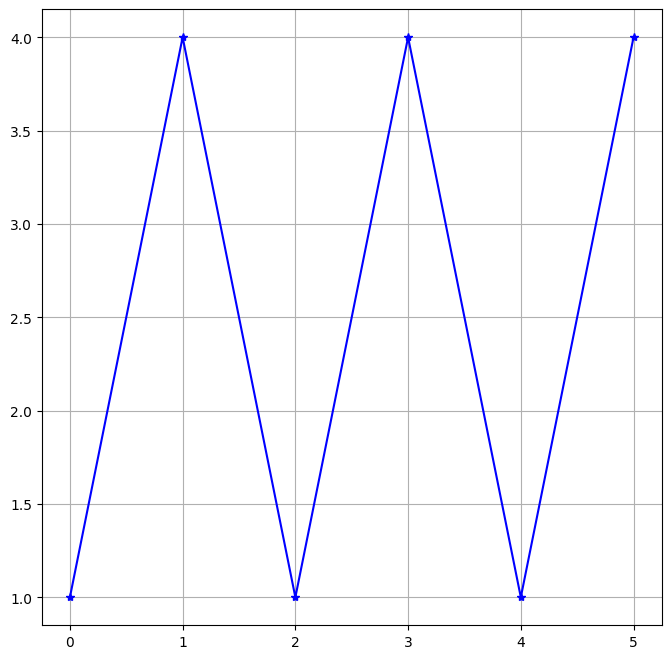

In [ ]:
import numpy as np
def mod_power(a, n, m):
	r = 1
	while n > 0:
		if n & 1 == 1:
			r = (r * a) % m
		a = (a * a) % m
		n >>= 1
	return r
a=2
a = 3
p = 1000003
p=347# 1931 , 1933, 1949, 1951, 1973, 1979, 1987, 1993, 1997, 1999
q = 307 #, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409,
#p=61
q =  1931 
p= 1933 

N = p*q
N = 15
a=4

print("N =",N,"a =",a," MCD(a,N)=",np.gcd(a,N))

#dat = [a**i % N for i in range(100)]
i=2
while (mod_power(a, i, N)) > 1:
#while (a**i % N) > 1:
  i += 2
r = i
print("Periodo = ",r)
dat = [a**i % N for i in range(3*r)]
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8))
plt.plot(dat,'-*b')
plt.grid()
plt.draw()



El método de dividir consecutivamente por los enteros impares es mucho más eficiente que el método del periodo en una computadora clásica

In [ ]:
p= 122949829
q = 141650939
N = p*q
i=3
while (N %i != 0):
  i += 2
print("Factores : ",i,N//i)

Factores :  122949829 141650939


In [ ]:
import numpy as np

print("Los factores primos son:",np.gcd(a**(r//2) +1,N),np.gcd(a**(r//2) -1,N))

Los factores primos son: 5 3


## **10.2 Transformada Discreta de Fourier**


La transformada discreta de Fourier (DFT) transforma una secuencia finita de valores complejos 
$$
x[n]={x_0,x_1,x_2,....,x_{N-1}}
$$
que pueden corresponder a puntos espaciados uniformemente de una señal en el dominio del tiempo en una secuencia de igual número de valores complejos 
$$
X[n]={X_0,X_1,X_2,....,X_{N-1}}
$$

que corresponden a puntos de la señal en el dominio de la frecuencia también uniformemente espaciados.

La definición de la transformada  de Fourier discreta (DFT) 


$$
X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} 
$$

La definición de la transformada  de Fourier discreta inversa (IDFT) 


$$
x_k = \frac{1}{N}\sum_{n=0}^{N-1}{X_n\cdot e^{i2\pi{kn/N}}} 
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
def x(t):
    return 1+2*np.cos(2*np.pi*5*t)+3*np.sin(2*np.pi*7*t)
T = 1
sr = 40
ts = np.linspace(0, T, sr*T)
t = np.linspace(0, T, 1000)
Corr_cos=np.zeros((sr*T))
Corr_sen=np.zeros((sr*T))
N=np.arange(0, sr*T)

def Grafica(n):
  ax[0].clear() 
  ax[1].clear()

  frec = n/T
  Corr_cos[n] = np.dot(x(ts),np.cos(-2*np.pi*n*ts/T))
  Corr_sen[n] = np.dot(x(ts),np.sin(-2*np.pi*n*ts/T))



  ax[0].plot(t, x(t),'b')
  ax[0].plot(t, np.cos(2*np.pi*n*t/T),'r')
  ax[0].plot(t, np.sin(2*np.pi*n*t/T),'g')
  ax[0].plot(ts, x(ts),'.b',ms=10)
  ax[0].plot(ts, np.cos(2*np.pi*n*ts/T),'.r',ms=10)
  ax[0].plot(ts, np.sin(2*np.pi*n*ts/T),'.g',ms=10)

  #ax[1].title('Frecuencia  Señal de Correlación = {}'.format(frec)+ ' Hz, GS'+'= {}'.format(np.round(GS,1)), fontsize=18)
  ax[0].set_xlabel('t', fontsize=18)
  ax[0].set_ylabel('x(t)', fontsize=18)
  ax[0].grid()


  ax[1].plot(N, Corr_cos,'-r',ms=10,label='Corr Cos para k={}'.format(n))
  ax[1].plot(N, Corr_sen,'-.g',ms=10,label='Corr Sen para k={}'.format(n))

  #ax[2].title('Frecuencia  Señal de Correlación = {}'.format(frec)+ ' Hz, GS'+'= {}'.format(np.round(GS,1)), fontsize=18)
  ax[1].set_xlabel('k', fontsize=18)
  ax[1].set_ylabel(r'$X_k$', fontsize=18)
  ax[1].grid()
  ax[1].legend()

fig=plt.figure(figsize=(10,6), dpi= 100)
ax= fig.subplots(2,1)
anim = animation.FuncAnimation(fig, Grafica, frames=40 , interval=800)
plt.close()
HTML(anim.to_html5_video())

## **10.3 Cálculo del Periodo usando Computación Cuántica**



https://qiskit.org/textbook/ch-algorithms/shor.html

Nota: this implementation of Shor's algorithm uses 4n+2
 qubits, where n es el número de bit que se requieren para representar N.
 Por ejemplo para N = 15, n = 4 y se requieren 18 qubits
 

In [ ]:
from qiskit.circuit import Gate

U_f = Gate(name='U_f', num_qubits=2, params=[])

In [ ]:
import qiskit as qk
qr = qk.QuantumRegister(2)
cr = qk.ClassicalRegister(2)
qc = qk.QuantumCircuit(qr,cr)

In [ ]:
from qiskit import *
qc = QuantumCircuit(8, 8)
for q in range(4):
    qc.h(q)
# And auxiliary register in state |1>
qc.append(U_f [qr[0], qr[1]])

qc.barrier()


qc.measure(range(4), range(4))
style = {'backgroundcolor': 'lightgreen'}
qc.draw('mpl',fold=-1,style=style)  # -1 means 'do not fold' 

TypeError: 'Gate' object is not subscriptable

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
from math import gcd
from numpy.random import randint
from fractions import Fraction
print("Imports Successful")
import qiskit.quantum_info as qi
qc = QuantumCircuit(4,4) # Ponemos 4 qubits y 4 bits
# Aplicamos algunas compuertas
qc.x(0)
qc.y(1)
qc.z(2)
qc.h(3)
stv = qi.Statevector.from_instruction(qc)

Imports Successful


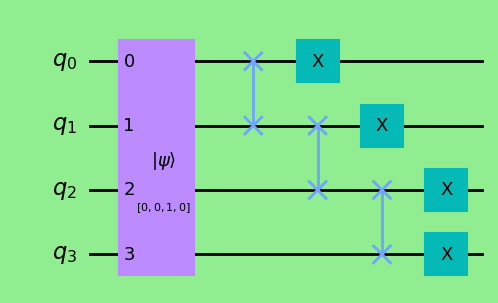

In [ ]:
## Create 7mod15 gate
N = 15
m = int(np.ceil(np.log2(N)))
import qiskit.quantum_info as qi

U_qc = QuantumCircuit(m)
#U_qc.x(0)
U_qc.initialize('0010')
U_qc.swap(0, 1)
U_qc.swap(1, 2)
U_qc.swap(2, 3)
for q in range(4):
    U_qc.x(q)


#U = U_qc.to_gate()
stv = qi.Statevector.from_instruction(U_qc)
#U.name ='{}Mod{}'.format(7, N)
U_qc.draw('mpl',fold=-1,style=style) 

In [ ]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

In [ ]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [ ]:
# Specify variables
n_count = 8  # number of counting qubits
a = 7

In [ ]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

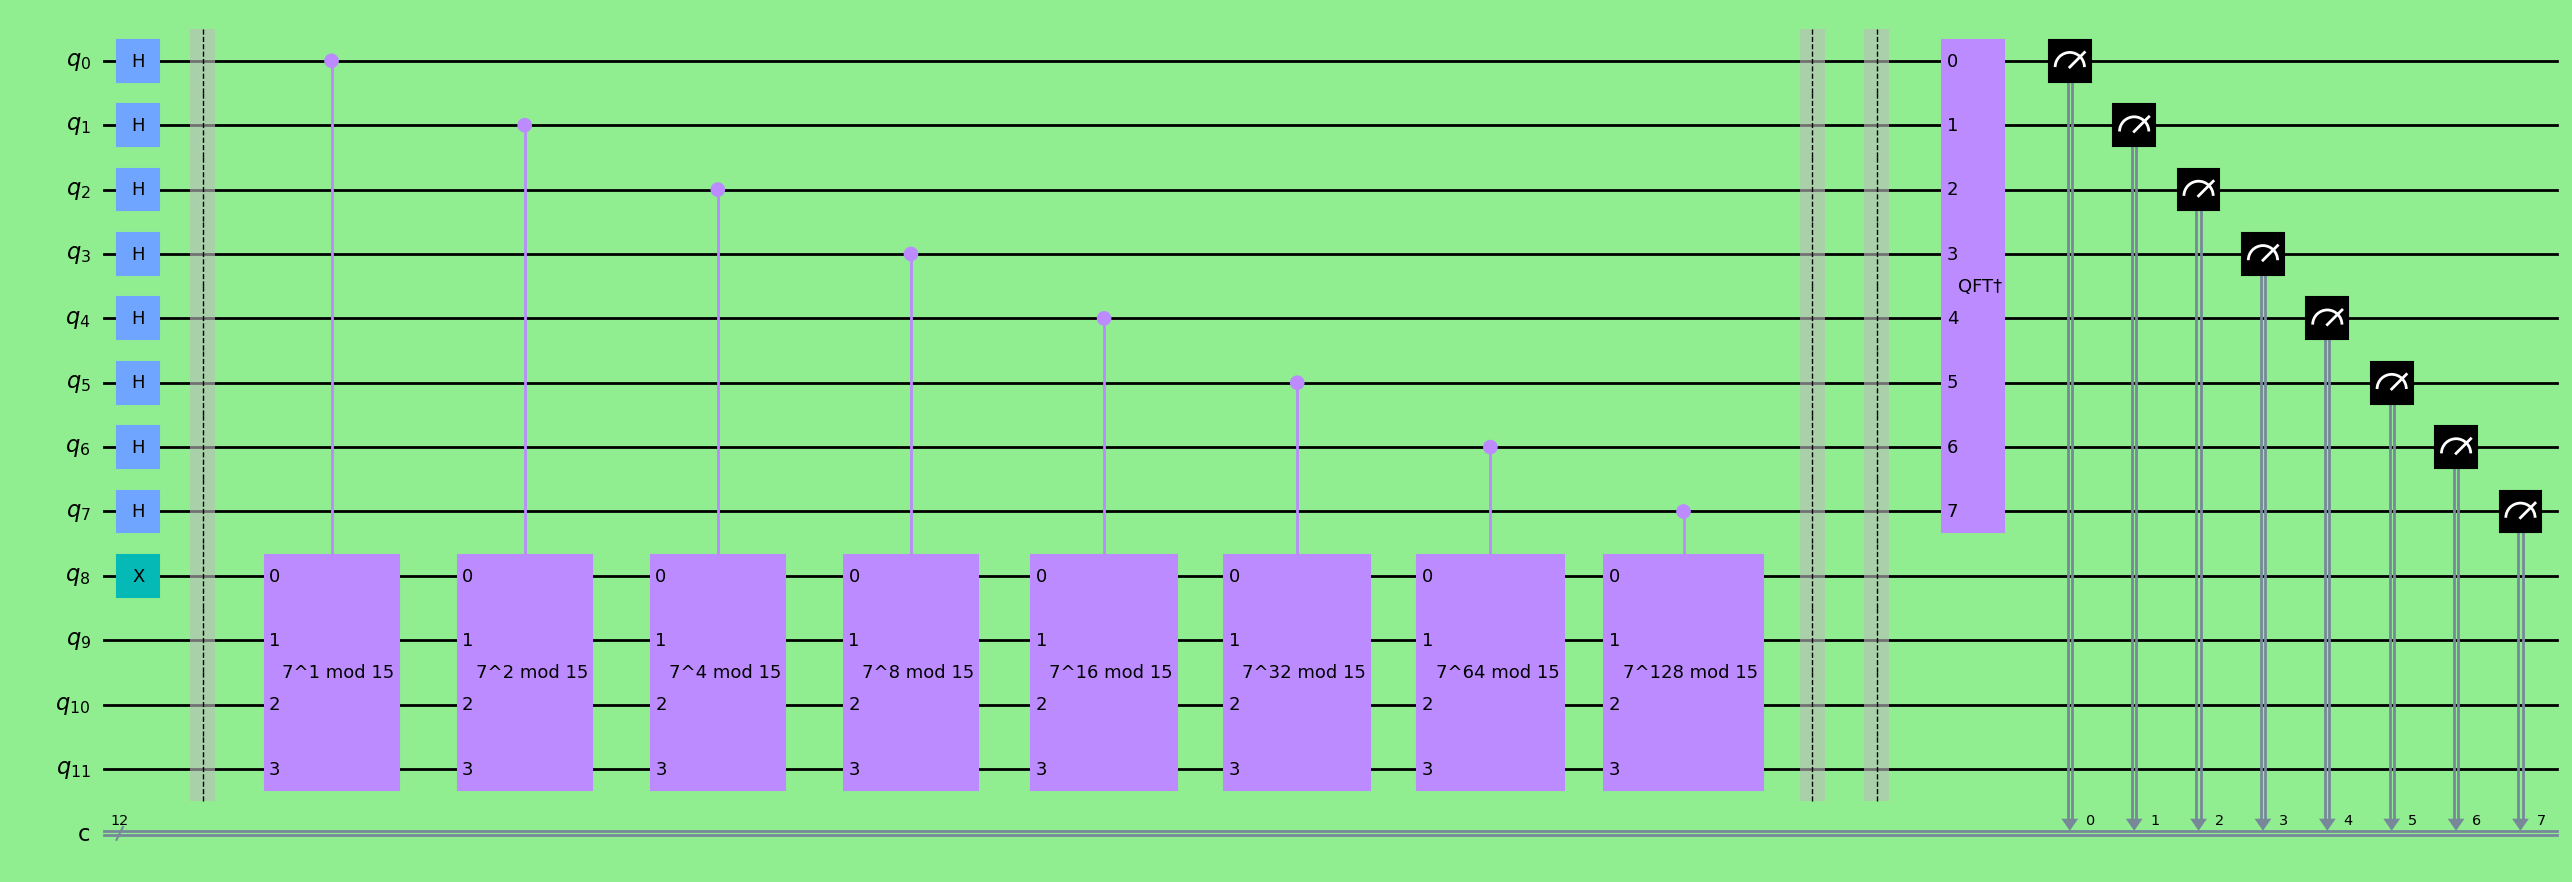

In [ ]:

# Create QuantumCircuit with n_count counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(n_count + 4, n_count+ 4)

# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc.h(q)
# And auxiliary register in state |1>
qc.x(n_count)

qc.barrier()

stv1 = qi.Statevector.from_instruction(qc)
# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])
qc.barrier()
stv2 = qi.Statevector.from_instruction(qc)

#for qubit in range(8,12):
#  qc.measure(qubit,qubit)
qc.barrier()

# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

# Measure circuit
qc.measure(range(n_count), range(n_count))
style = {'backgroundcolor': 'lightgreen'}
qc.draw('mpl',fold=-1,style=style)  # -1 means 'do not fold' 

In [ ]:
stv1.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

In [ ]:
stv2.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

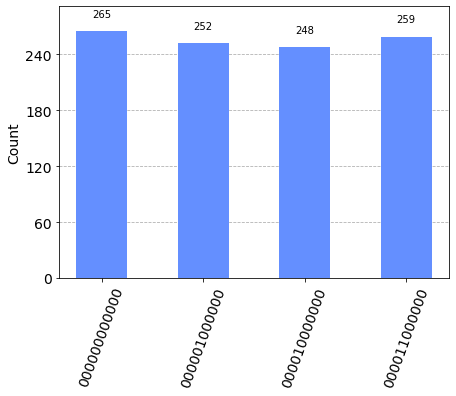

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

Para entender los detalles vamos a basarnos en 

https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/algorithms/shor_algorithm.ipynb 

que a su vez se basa en

Shor's Algorithm for Factoring Large Integers

C. Lavor, L.R.U. Manssur, R. Portugal

https://arxiv.org/abs/quant-ph/0303175


## **10.3.1 Quantum Fourier Transform (QFT)**

 
La transformada discreta de Fourier (DFT) actúa sobre un vector $(x_0, ..., x_{N-1})$ y lo mapea al vector $(y_0, ..., y_{N-1})$ de acuerdo con la fórmula:

$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_je^{-2\pi i \frac{jk}{N}}$$

Similarmente la QFT mapea cada estado cuántico $\vert k \rangle$ en una superposición de estados dada por

$$\vert k \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}e^{-2\pi i \frac{jk}{N}} \vert j \rangle$$

Se puede representar por el operador unitario

$$ U_{QFT} = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} \sum_{k=0}^{N-1} e^{-2\pi i \frac{jk}{N}} \vert j \rangle \langle k \vert$$

## **10.3.2 Factorización del Número 21**

Fuente: https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/algorithms/shor_algorithm.ipynb

Let's factorize $N = 21$ with coprime $x=2$, following the [above steps](#stepstwo) of the quantum period finding algorithm, which should return $r = 6$. This example follows one from [this](https://arxiv.org/abs/quant-ph/0303175) tutorial. 

1. Choose $T = 2^t$ such that $N^2 \leq T \le 2N^2$. For $N = 21$, the smallest value of $t$ is 9, meaning $T = 2^t = 512$. Initialise two registers of qubits, first an argument register with $t = 9$ qubits, and second a function register with $n = log_2 N = 5$ qubits: 
$$\vert\psi_0\rangle = \vert 0 \rangle \vert 0 \rangle$$

2. Apply a Hadamard gate on each of the qubits in the argument register: 
$$\vert\psi_1\rangle = \frac{1}{\sqrt{T}}\sum_{a=0}^{T-1}\vert a \rangle \vert 0 \rangle = \frac{1}{\sqrt{512}}\sum_{a=0}^{511}\vert a \rangle \vert 0 \rangle$$

3. Implement the modular exponentiation function $x^a \bmod N$ on the function register:
\begin{eqnarray}
\vert\psi_2\rangle 
& = & \frac{1}{\sqrt{T}}\sum_{a=0}^{T-1}\vert a \rangle \vert x^a \bmod N \rangle
 = \frac{1}{\sqrt{512}}\sum_{a=0}^{511}\vert a \rangle \vert 2^a \bmod 21 \rangle \\
& = & \frac{1}{\sqrt{512}} \bigg( \;\; \vert 0 \rangle \vert 1 \rangle + \vert 1 \rangle \vert 2 \rangle +
\vert 2 \rangle \vert 4 \rangle + \vert 3 \rangle \vert 8 \rangle + \;\; \vert 4 \rangle \vert 16 \rangle + \;\,
\vert 5 \rangle \vert 11 \rangle \, + \\
& & \;\;\;\;\;\;\;\;\;\;\;\;\;\, \vert 6 \rangle \vert 1 \rangle + \vert 7 \rangle \vert 2 \rangle + \vert 8 \rangle \vert 4 \rangle + \vert 9 \rangle \vert 8 \rangle + \vert 10 \rangle \vert 16 \rangle + \vert 11 \rangle \vert 11 \rangle \, +\\
& & \;\;\;\;\;\;\;\;\;\;\;\;\, \vert 12 \rangle \vert 1 \rangle + \ldots \bigg)\\
\end{eqnarray}
Notice that the above expression has the following pattern: the states of the second register of each “column” are the same. Therefore we can rearrange the terms in order to collect the second register:
\begin{eqnarray}
\vert\psi_2\rangle 
& = & \frac{1}{\sqrt{512}} \bigg[ \big(\,\vert 0 \rangle + \;\vert 6 \rangle + \vert 12 \rangle \ldots + \vert 504 \rangle + \vert 510 \rangle \big) \, \vert 1 \rangle \, + \\
& & \;\;\;\;\;\;\;\;\;\;\; \big(\,\vert 1 \rangle + \;\vert 7 \rangle + \vert 13 \rangle \ldots + \vert 505 \rangle + \vert 511 \rangle \big) \, \vert 2 \rangle \, + \\
& & \;\;\;\;\;\;\;\;\;\;\; \big(\,\vert 2 \rangle + \;\vert 8 \rangle + \vert 14 \rangle \ldots + \vert 506 \rangle +  \big) \, \vert 4 \rangle \, +  \\
& & \;\;\;\;\;\;\;\;\;\;\; \big(\,\vert 3 \rangle + \;\vert 9 \rangle + \vert 15 \rangle \ldots + \vert 507 \rangle +  \big) \, \vert 8 \rangle \, +  \\
& & \;\;\;\;\;\;\;\;\;\;\; \big(\,\vert 4 \rangle + \vert 10 \rangle + \vert 16 \rangle \ldots + \vert 508 \rangle +  \big)  \vert 16 \rangle \, +  \\
& & \;\;\;\;\;\;\;\;\;\;\; \big(\,\vert 5 \rangle + \vert 11 \rangle + \vert 17 \rangle \ldots + \vert 509 \rangle +  \big)  \vert 11 \rangle \, \bigg]\\
\end{eqnarray}

4. To simplify following equations, we'll measure the function register before performing a quantum Fourier transform on the argument register. This will yield one of the following numbers with equal probability: $\{1,2,4,6,8,16,11\}$. Suppose that the result of the measurement was $2$, then:
$$\vert\psi_3\rangle = \frac{1}{\sqrt{86}}(\vert 1 \rangle + \;\vert 7 \rangle + \vert 13 \rangle \ldots + \vert 505 \rangle + \vert 511 \rangle)\, \vert 2 \rangle $$
It does not matter what is the result of the measurement; what matters is the periodic pattern. The period of the states of the first register is the solution to the problem and the quantum Fourier transform can reveal the value of the period.

5. Perform a quantum Fourier transform on the argument register:
$$
\vert\psi_4\rangle
 = QFT(\vert\psi_3\rangle)
 = QFT(\frac{1}{\sqrt{86}}\sum_{a=0}^{85}\vert 6a+1 \rangle)\vert 2 \rangle
 = \frac{1}{\sqrt{512}}\sum_{j=0}^{511}\bigg(\big[ \frac{1}{\sqrt{86}}\sum_{a=0}^{85} e^{-2 \pi i \frac{6ja}{512}} \big] e^{-2\pi i\frac{j}{512}}\vert j \rangle \bigg)\vert 2 \rangle
$$

6. Measure the argument register. The probability of measuring a result $j$ is:
$$ \rm{Probability}(j) = \frac{1}{512 \times 86} \bigg\vert \sum_{a=0}^{85}e^{-2 \pi i \frac{6ja}{512}} \bigg\vert^2$$
This peaks at $j=0,85,171,256,341,427$. Suppose that the result of the measurement yielded $j = 85$, then using continued fraction approximation of $\frac{512}{85}$, we obtain $r=6$, as expected. 

Por interferencia cuántica solo quedan estados $|z> = qT/r$ con T = 512 y $q$ entero arbitrario entre 0 y $r-1$ 

$$85/512=\frac{1}{6 + \frac{1}{42+ \frac{1}{2}}}$$

De aquí que $r=6$


In [ ]:
import cmath
a = 2
def suma(i):
  b=0
  for a in range(86):
    b+= cmath.exp(-2*np.pi*1j*6*i*a/512)
  return abs(b)**2
dat = [suma(i) for i in range(512)]
probability = np.array(dat)/512/86
import plotly.express as px
fig=px.line(probability,markers=True)
fig.show()


In [ ]:
import numpy as np
a=2
N=21
r=6
print("Los factores primos son:",np.gcd(a**(r//2) +1,N),np.gcd(a**(r//2) -1,N))

Los factores primos son: 3 7


**Tarea: Hacer el cálculo en un circuito cuántico de Qiskit**

**Tarea: Factorizar 35 a mano y con un circuito cuántico**

# **11. Código Superdenso**

Envío de 2 bits de información a través del envío de un qubit

<img src="https://qiskit.org/textbook/ch-algorithms/images/superdense.jpg" alt="Alternative text" />


Nota: La figurá debe ser tal que el qubit más significativo se manda a Alice (el qubit que está a más abajo en un diagrama cuántico, de acuerdo con la convención de Qiskit)

Fuente: https://qiskit.org/textbook/ch-algorithms/superdense-coding.html

Lo que hace Alice con su qubit (el qubit más significativo) antes de mandárselo a Bob
```
Mensaje      Operación     Resultado

00	            I          |00⟩+|11⟩

01	            X          |10⟩+|01⟩

10	            Z          |00⟩−|11⟩

11	            ZX        -|10⟩+|01⟩

```
Lo que hace Bob a su par de qubits
```
Aplica CNOT y H
```

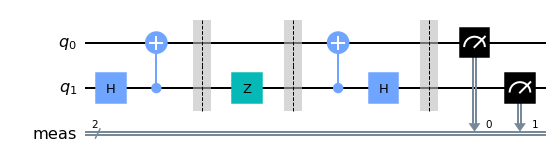

In [ ]:
# Importing everything
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
def create_bell_pair():
    """
    Returns:
        QuantumCircuit: Circuit that produces a Bell pair
    """
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc
def encode_message(qc, qubit, msg):
    """Encodes a two-bit message on qc using the superdense coding protocol
    Args:
        qc (QuantumCircuit): Circuit to encode message on
        qubit (int): Which qubit to add the gate to
        msg (str): Two-bit message to send
    Returns:
        QuantumCircuit: Circuit that, when decoded, will produce msg
    Raises:
        ValueError if msg is wrong length or contains invalid characters
    """
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc
def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc
qc = create_bell_pair()

# We'll add a barrier for visual separation
qc.barrier()

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 1. In this case,
# we want to send the message '10'. You can try changing this
# value and see how it affects the circuit
message = '10'
qc = encode_message(qc, 1, message)
qc.barrier()
# Alice then sends her qubit to Bob.

# After recieving qubit 0, Bob applies the recovery protocol:
qc = decode_message(qc)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
qc.draw("mpl")

{'11': 1}


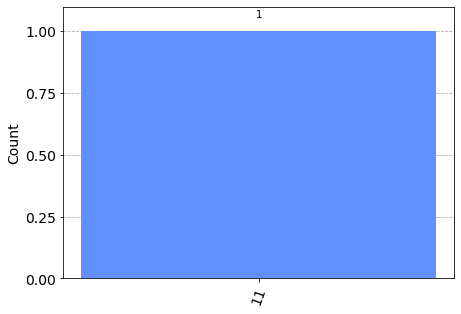

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend, shots=1)
result = job.result()
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))

# **12. Algoritmo de Grover (Lov Kumar Grover, 1996)**

Sirve para hacer búsqueda en una secuencia no ordenada de datos con N componentes en un tiempo $O (N^{1/2})$

Ver https://qiskit.org/textbook/ch-algorithms/grover.html

In [ ]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile,execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
import qiskit.quantum_info as qi

# import basic plot tools
from qiskit.visualization import plot_histogram

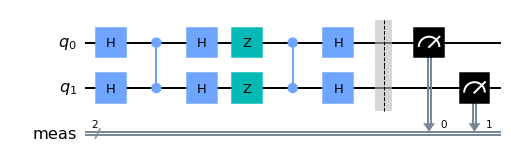

In [ ]:
qc = QuantumCircuit(2)
qc.h(0) # Oracle
qc.h(1) # Oracle
qc.cz(0,1) # Oracle
# Diffusion operator (U_s)
qc.h([0,1])
qc.z([0,1])
qc.cz(0,1)
qc.h([0,1])
qc.measure_all()
qc.draw('mpl')

{'11': 1000}


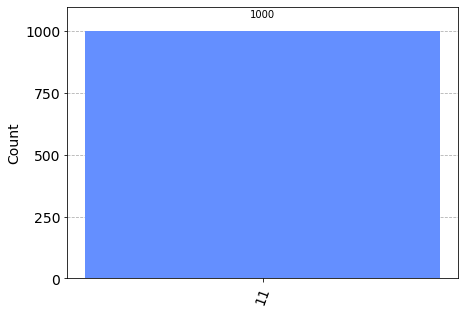

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend, shots=1000)
result = job.result()
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))